In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)
pd.set_option('display.max_columns', None)

## Dataset :

The data contains demographic details, work-related metrics and attrition flag.

* **EmployeeNumber** - Employee Identifier
* **Attrition** - Did the employee attrite?
* **Age** - Age of the employee
* **BusinessTravel** - Travel commitments for the job
* **DailyRate** - Data description not available**
* **Department** - Employee Department
* **DistanceFromHome** - Distance from work to home (in km)
* **Education** - 1-Below College, 2-College, 3-Bachelor, 4-Master,5-Doctor
* **EducationField** - Field of Education
* **EnvironmentSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **Gender** - Employee's gender
* **HourlyRate** - Data description not available**
* **JobInvolvement** - 1-Low, 2-Medium, 3-High, 4-Very High
* **JobLevel** - Level of job (1 to 5)
* **JobRole** - Job Roles
* **JobSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **MaritalStatus** - Marital Status
* **MonthlyIncome** - Monthly Salary
* **MonthlyRate** - Data description not available**
* **NumCompaniesWorked** - Number of companies worked at
* **Over18** - Over 18 years of age?
* **OverTime** - Overtime?
* **PercentSalaryHike** - The percentage increase in salary last year
* **PerformanceRating** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **RelationshipSatisfaction** - 1-Low, 2-Medium, 3-High, 4-Very High
* **StandardHours** - Standard Hours
* **StockOptionLevel** - Stock Option Level
* **TotalWorkingYears** - Total years worked
* **TrainingTimesLastYear** - Number of training attended last year
* **WorkLifeBalance** - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* **YearsAtCompany** - Years at Company
* **YearsInCurrentRole** - Years in the current role
* **YearsSinceLastPromotion** - Years since the last promotion
* **YearsWithCurrManager** - Years with the current manager

# EDA

In [ ]:
df = pd.read_csv('/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Unnamed: 0  EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0           0               1       Yes   41      Travel_Rarely       1102   
1           1               2        No   49  Travel_Frequently        279   
2           2               3       Yes   37      Travel_Rarely       1373   
3           3               4        No   33  Travel_Frequently       1392   
4           4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
df.select_dtypes(include='object').nunique()

Attrition         2
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [ ]:
df.select_dtypes(include='int').nunique()

Unnamed: 0                  2940
EmployeeNumber              2940
Age                           43
DailyRate                    886
DistanceFromHome              29
Education                      5
EnvironmentSatisfaction        4
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobSatisfaction                4
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithCurrManager          18
dtype: int64

In [ ]:
df.drop(columns=['EmployeeNumber', 'StandardHours','Over18', 'PerformanceRating'], inplace=True)

In [ ]:
df.select_dtypes(include='int')

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0      41       1102                 1          2                        2   
1      49        279                 8          1                        3   
2      37       1373                 2          2                        4   
3      33       1392                 3          4                        4   
4      27        591                 2          1                        1   
...   ...        ...               ...        ...                      ...   
2935   36        884                23          2                        3   
2936   39        613                 6          1                        4   
2937   27        155                 4          3                        2   
2938   49       1023                 2          3                        4   
2939   34        628                 8          3                        2   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
0             94               3         2                4           5993   
1             61               2         2                2           5130   
2             92               2         1                3           2090   
3             56               3         1                3           2909   
4             40               3         1                2           3468   
...          ...             ...       ...              ...            ...   
2935          41               4         2                4           2571   
2936          42               2         3                1           9991   
2937          87               4         2                2           6142   
2938          63               2         2                2           5390   
2939          82               4         2                3           4404   

      MonthlyRate  NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
0           19479                   8                 11                  3   
1           24907                   1                 23                  4   
2            2396                   6                 15                  3   
3           23159                   1                 11                  3   
4           16632                   9                 12                  3   
...           ...                 ...                ...                ...   
2935        12290                   4                 17                  3   
2936        21457                   4                 15                  3   
2937         5174                   1                 20                  4   
2938        13243                   2                 14                  3   
2939        10228                   2                 12                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
0                            1                 0                  8   
1                            4                 1                 10   
2                            2                 0                  7   
3                            3                 0                  8   
4                            4                 1                  6   
...                        ...               ...                ...   
2935                         3                 1                 17   
2936                         1                 1                  9   
2937                         2                 1                  6   
2938                         4                 0                 17   
2939                         1                 0                  6   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                         0                1               6   
1                         3                3              10   
2                         3                3               0   
3                         3                3               8   
4         

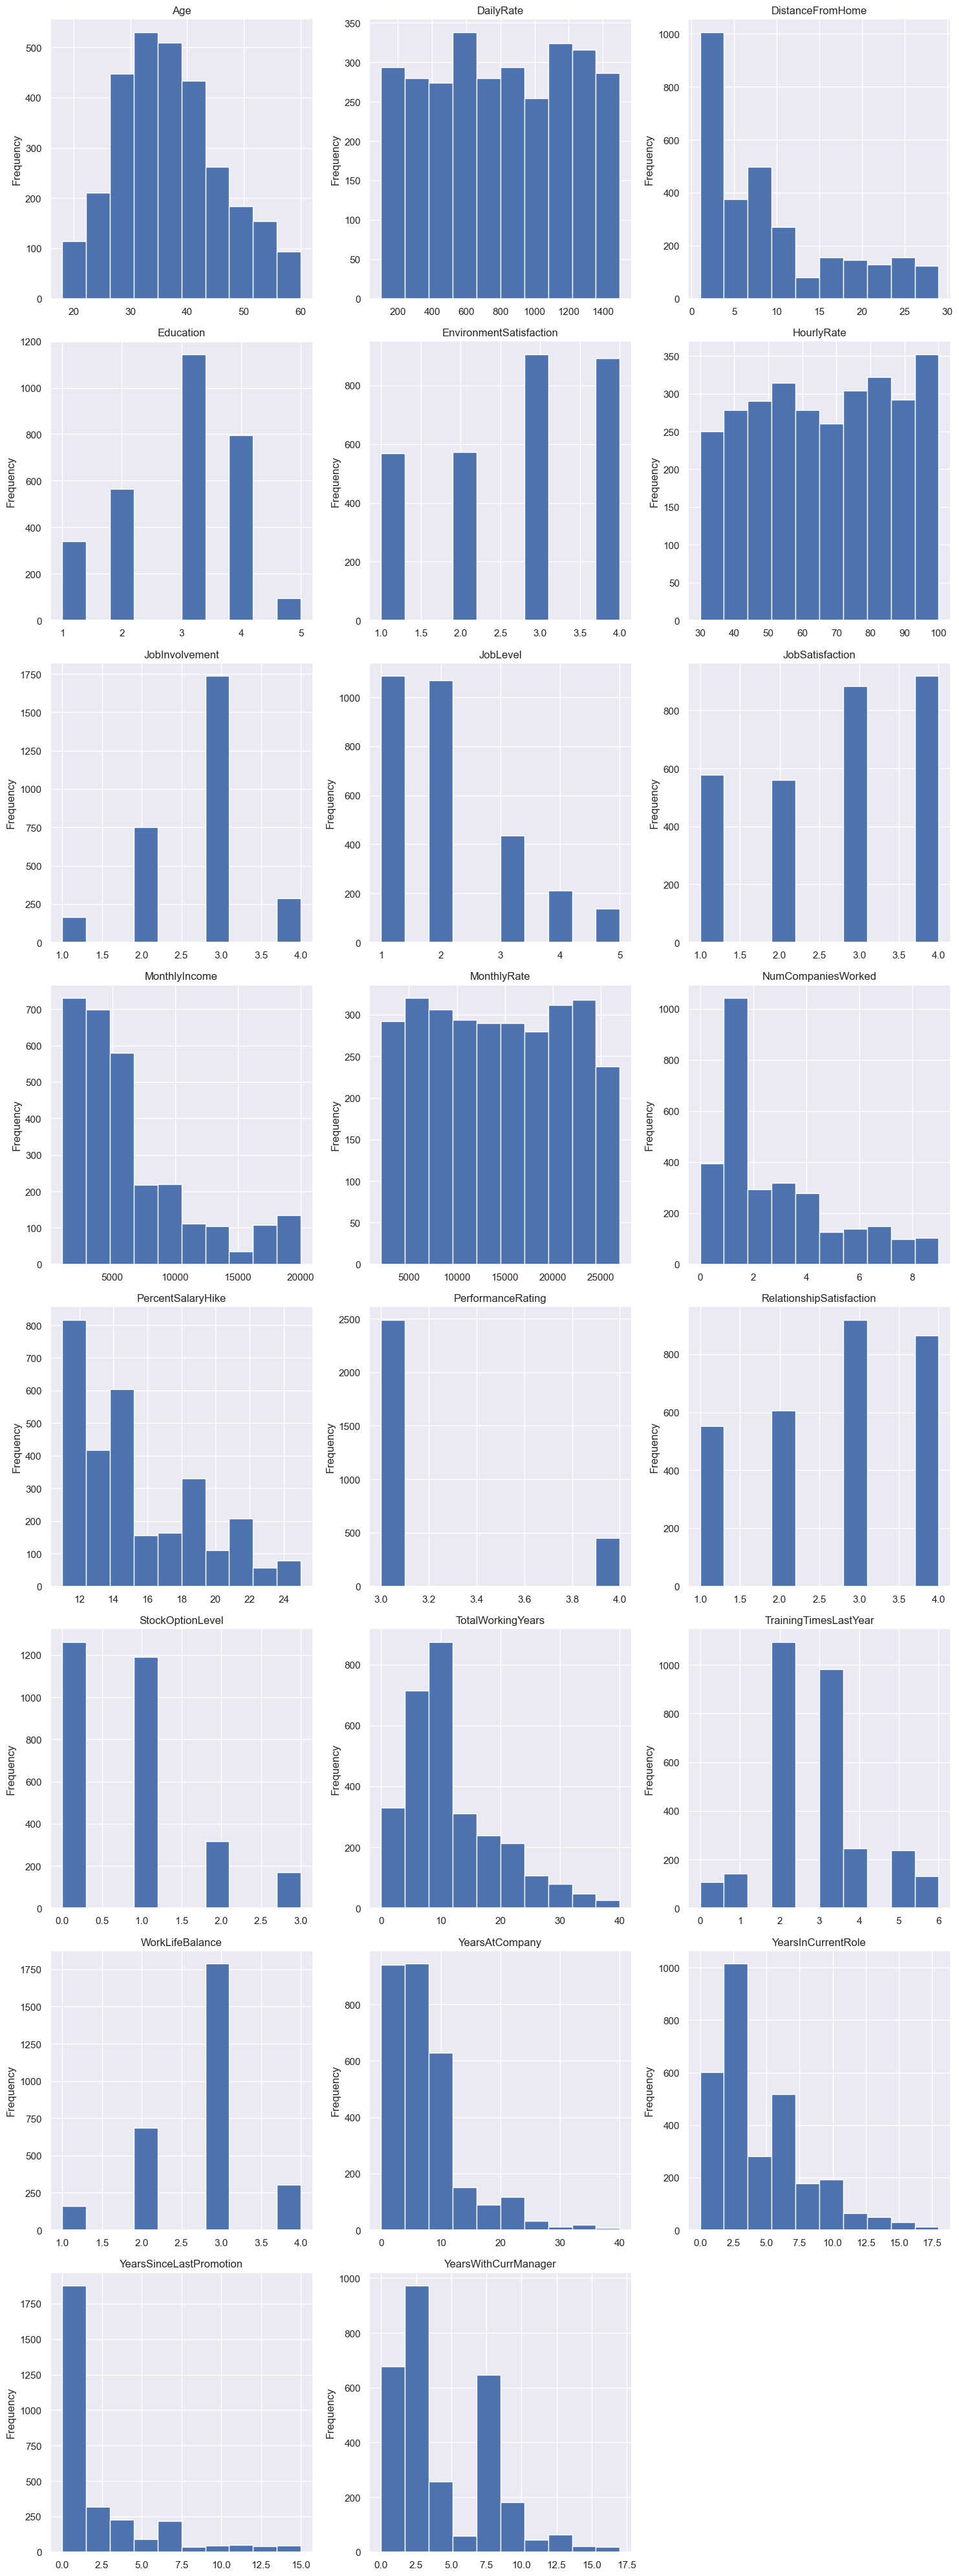

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

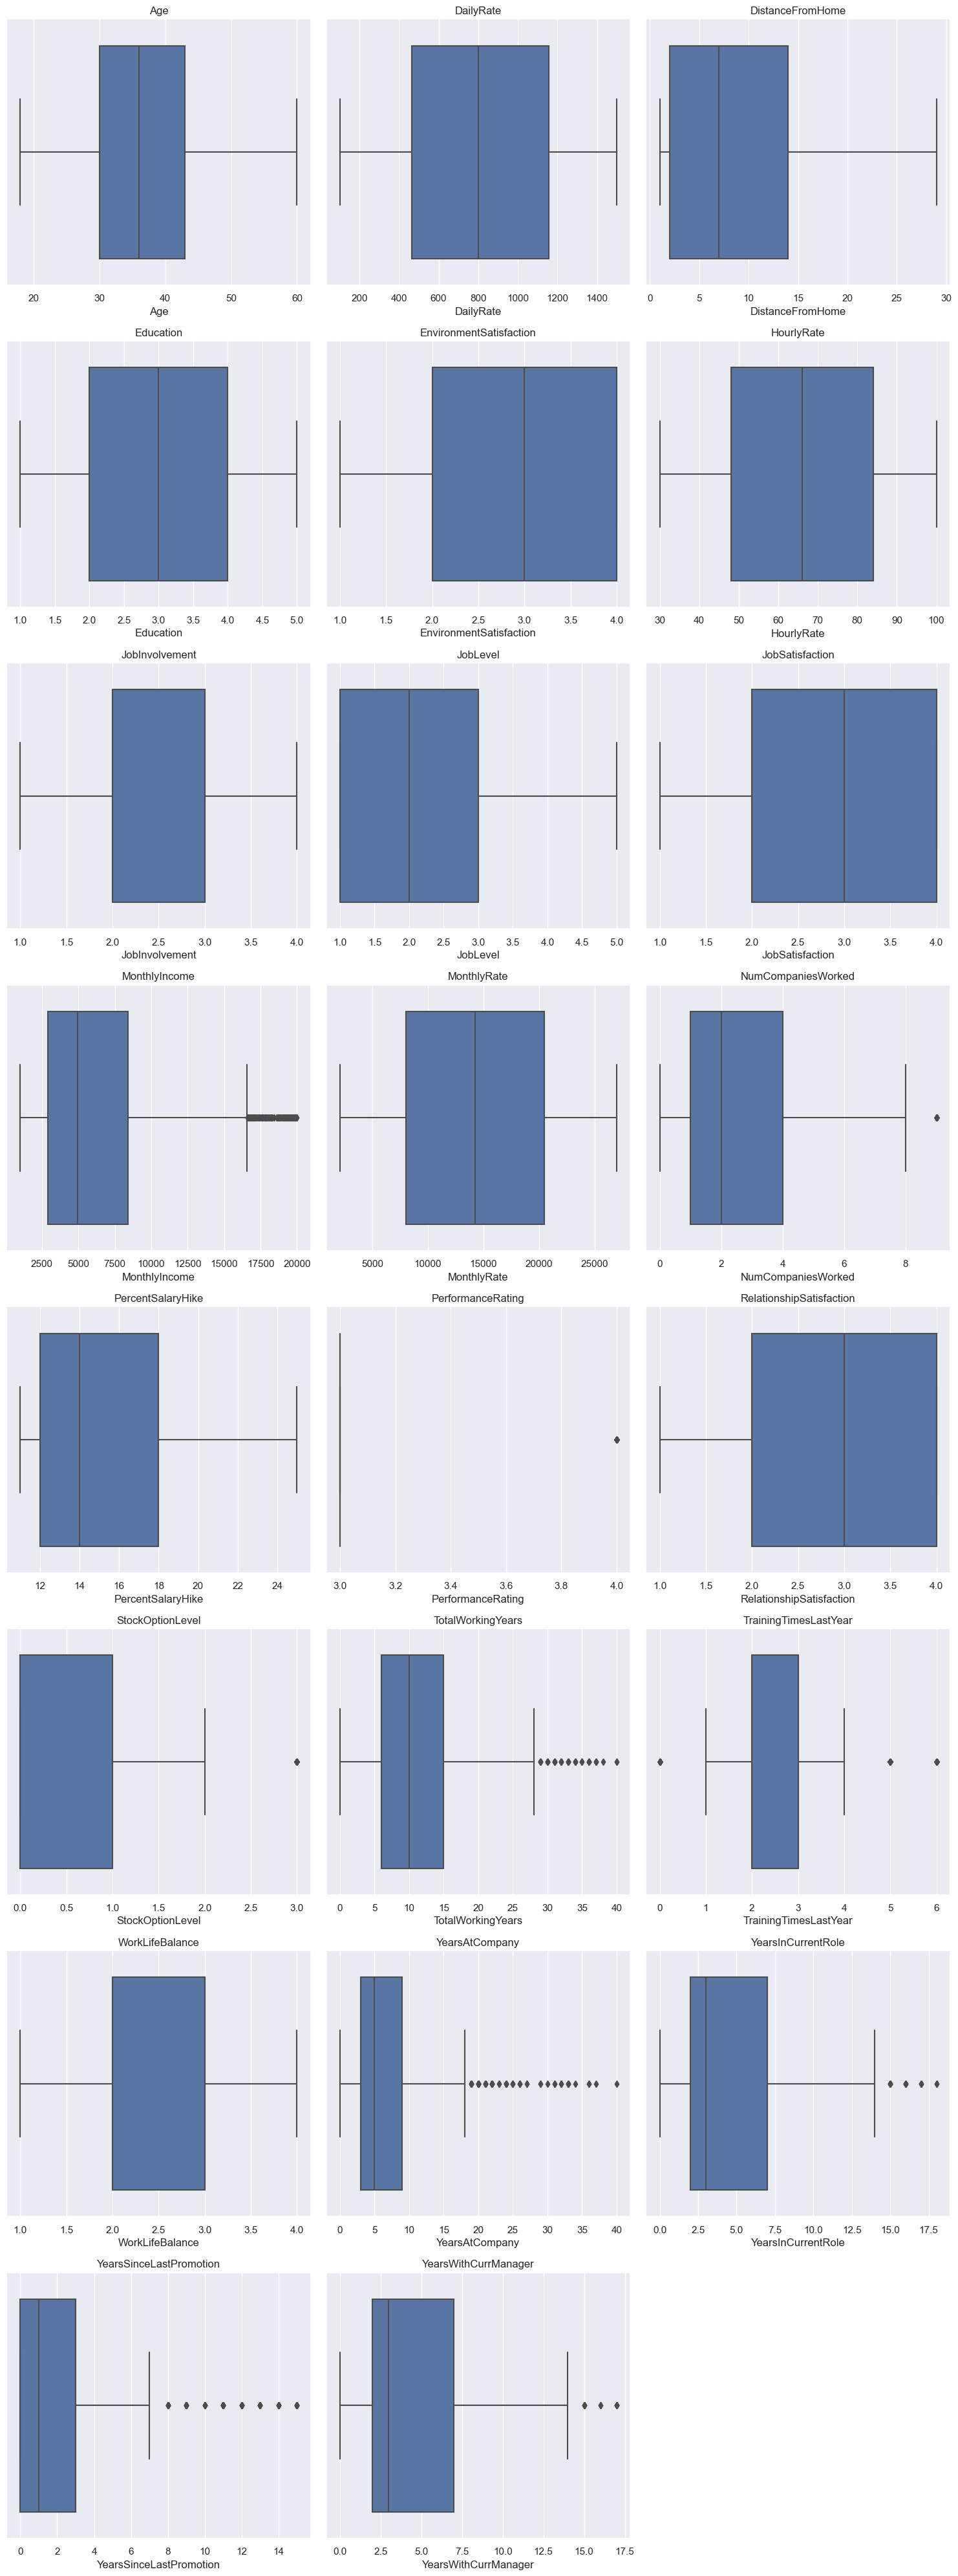

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn
for i, var in enumerate(int_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [ ]:
# Filter columns with data type 'int'
int_columns = df.select_dtypes(include='int')


mean_values = int_columns.mean()
std_values = int_columns.std()
min_values = int_columns.min()
q1_values = int_columns.quantile(0.25)
q2_values = int_columns.quantile(0.5)
q3_values = int_columns.quantile(0.75)
iqr_values = q3_values - q1_values
max_values = int_columns.max()
statistics_df = pd.DataFrame({
    'Mean': mean_values,
    'Std': std_values,
    'Min': min_values,
    'Q1': q1_values,
    'Q2 (Median)': q2_values,
    'Q3': q3_values,
    'IQR': iqr_values,
    'Max': max_values
})

statistics_df

Mean          Std   Min      Q1  \
Age                          36.923810     9.133819    18    30.0   
DailyRate                   802.485714   403.440447   102   465.0   
DistanceFromHome              9.192517     8.105485     1     2.0   
Education                     2.912925     1.023991     1     2.0   
EnvironmentSatisfaction       2.721769     1.092896     1     2.0   
HourlyRate                   65.891156    20.325969    30    48.0   
JobInvolvement                2.729932     0.711440     1     2.0   
JobLevel                      2.063946     1.106752     1     1.0   
JobSatisfaction               2.728571     1.102658     1     2.0   
MonthlyIncome              6502.931293  4707.155770  1009  2911.0   
MonthlyRate               14313.103401  7116.575021  2094  8045.0   
NumCompaniesWorked            2.693197     2.497584     0     1.0   
PercentSalaryHike            15.209524     3.659315    11    12.0   
PerformanceRating             3.153741     0.360762     3     3.0   
RelationshipSatisfaction      2.712245     1.081025     1     2.0   
StockOptionLevel              0.793878     0.851932     0     0.0   
TotalWorkingYears            11.279592     7.779458     0     6.0   
TrainingTimesLastYear         2.799320     1.289051     0     2.0   
WorkLifeBalance               2.761224     0.706356     1     2.0   
YearsAtCompany                7.008163     6.125483     0     3.0   
YearsInCurrentRole            4.229252     3.622521     0     2.0   
YearsSinceLastPromotion       2.187755     3.221882     0     0.0   
YearsWithCurrManager          4.123129     3.567529     0     2.0   

                          Q2 (Median)       Q3      IQR    Max  
Age                              36.0     43.0     13.0     60  
DailyRate                       802.0   1157.0    692.0   1499  
DistanceFromHome                  7.0     14.0     12.0     29  
Education                         3.0      4.0      2.0      5  
EnvironmentSatisfaction           3.0      4.0      2.0      4  
HourlyRate                       66.0     84.0     36.0    100  
JobInvolvement                    3.0      3.0      1.0      4  
JobLevel                          2.0      3.0      2.0      5  
JobSatisfaction                   3.0      4.0      2.0      4  
MonthlyIncome                  4919.0   8380.0   5469.0  19999  
MonthlyRate                   14235.5  20462.0  12417.0  26999  
NumCompaniesWorked                2.0      4.0      3.0      9  
PercentSalaryHike                14.0     18.0      6.0     25  
PerformanceRating                 3.0      3.0      0.0      4  
RelationshipSatisfaction          3.0      4.0      2.0      4  
StockOptionLevel                  1.0      1.0      1.0      3  
TotalWorkingYears                10.0     15.0      9.0     40  
TrainingTimesLastYear             3.0      3.0      1.0      6  
WorkLifeBalance                   3.0      3.0      1.0      4  
YearsAtCompany                    5.0      9.0      6.0     40  
YearsInCurrentRole                3.0      7.0      5.0     18  
YearsSinceLastPromotion           1.0      3.0      3.0     15  
YearsWithCurrManager              3.0      7.0      5.0     17

In [ ]:
# Filter columns with data type 'int'
int_columns = df.select_dtypes(include='int')
q1_values = int_columns.quantile(0.25)
q3_values = int_columns.quantile(0.75)
iqr_values = q3_values - q1_values
upper_whisker_values = q3_values + 1.5 * iqr_values
lower_whisker_values = q1_values - 1.5 * iqr_values

whisker_df = pd.DataFrame({
    'Upper Whisker': upper_whisker_values,
    'Lower Whisker': lower_whisker_values
})

whisker_df

Upper Whisker  Lower Whisker
Age                                62.5           10.5
DailyRate                        2195.0         -573.0
DistanceFromHome                   32.0          -16.0
Education                           7.0           -1.0
EnvironmentSatisfaction             7.0           -1.0
HourlyRate                        138.0           -6.0
JobInvolvement                      4.5            0.5
JobLevel                            6.0           -2.0
JobSatisfaction                     7.0           -1.0
MonthlyIncome                   16583.5        -5292.5
MonthlyRate                     39087.5       -10580.5
NumCompaniesWorked                  8.5           -3.5
PercentSalaryHike                  27.0            3.0
PerformanceRating                   3.0            3.0
RelationshipSatisfaction            7.0           -1.0
StockOptionLevel                    2.5           -1.5
TotalWorkingYears                  28.5           -7.5
TrainingTimesLastYear               4.5            0.5
WorkLifeBalance                     4.5            0.5
YearsAtCompany                     18.0           -6.0
YearsInCurrentRole                 14.5           -5.5
YearsSinceLastPromotion             7.5           -4.5
YearsWithCurrManager               14.5           -5.5

In [ ]:
import pandas as pd

# Assuming you already have the DataFrame 'df' containing the data

# Filter columns with data type 'int'
int_columns = df.select_dtypes(include='int')

q1_values = int_columns.quantile(0.25)
q3_values = int_columns.quantile(0.75)
iqr_values = q3_values - q1_values
upper_whisker_values = q3_values + 1.5 * iqr_values
lower_whisker_values = q1_values - 1.5 * iqr_values

outlier_count = ((int_columns < lower_whisker_values) | (int_columns > upper_whisker_values)).sum()
total_data_points = len(int_columns)
outlier_proportion = (outlier_count / total_data_points) * 100

outlier_list = {}
for col in int_columns.columns:
    outliers = int_columns[col][(int_columns[col] < lower_whisker_values[col]) | (int_columns[col] > upper_whisker_values[col])].tolist()
    outlier_list[col] = outliers

outlier_df = pd.DataFrame({
    'Outlier Count': outlier_count,
    'Outlier Proportion (%)': outlier_proportion,
    'Outlier List': outlier_list
})

outlier_df


Outlier Count  Outlier Proportion (%)  \
Age                                   0                0.000000   
DailyRate                             0                0.000000   
DistanceFromHome                      0                0.000000   
Education                             0                0.000000   
EnvironmentSatisfaction               0                0.000000   
HourlyRate                            0                0.000000   
JobInvolvement                        0                0.000000   
JobLevel                              0                0.000000   
JobSatisfaction                       0                0.000000   
MonthlyIncome                       228                7.755102   
MonthlyRate                           0                0.000000   
NumCompaniesWorked                  104                3.537415   
PercentSalaryHike                     0                0.000000   
PerformanceRating                   452               15.374150   
RelationshipSatisfaction              0                0.000000   
StockOptionLevel                    170                5.782313   
TotalWorkingYears                   126                4.285714   
TrainingTimesLastYear               476               16.190476   
WorkLifeBalance                       0                0.000000   
YearsAtCompany                      208                7.074830   
YearsInCurrentRole                   42                1.428571   
YearsSinceLastPromotion             214                7.278912   
YearsWithCurrManager                 28                0.952381   

                                                               Outlier List  
Age                                                                      []  
DailyRate                                                                []  
DistanceFromHome                                                         []  
Education                                                                []  
EnvironmentSatisfaction                                                  []  
HourlyRate                                                               []  
JobInvolvement                                                           []  
JobLevel                                                                 []  
JobSatisfaction                                                          []  
MonthlyIncome             [19094, 18947, 19545, 18740, 18844, 18172, 173...  
MonthlyRate                                                              []  
NumCompaniesWorked        [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, ...  
PercentSalaryHike                                                        []  
PerformanceRating         [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, ...  
RelationshipSatisfaction                                                 []  
StockOptionLevel          [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...  
TotalWorkingYears         [31, 29, 37, 38, 30, 40, 36, 34, 32, 33, 37, 3...  
TrainingTimesLastYear     [0, 5, 5, 5, 6, 5, 5, 5, 6, 6, 0, 0, 0, 5, 0, ...  
WorkLifeBalance                                                          []  
YearsAtCompany            [25, 22, 22, 27, 21, 22, 37, 25, 20, 40, 20, 2...  
YearsInCurrentRole        [15, 16, 18, 15, 18, 17, 16, 15, 16, 15, 16, 1...  
YearsSinceLastPromotion   [8, 15, 8, 8, 9, 13, 12, 10, 11, 9, 12, 15, 15...  
YearsWithCurrManager      [17, 15, 15, 15, 15, 17, 16, 17, 15, 17, 17, 1...

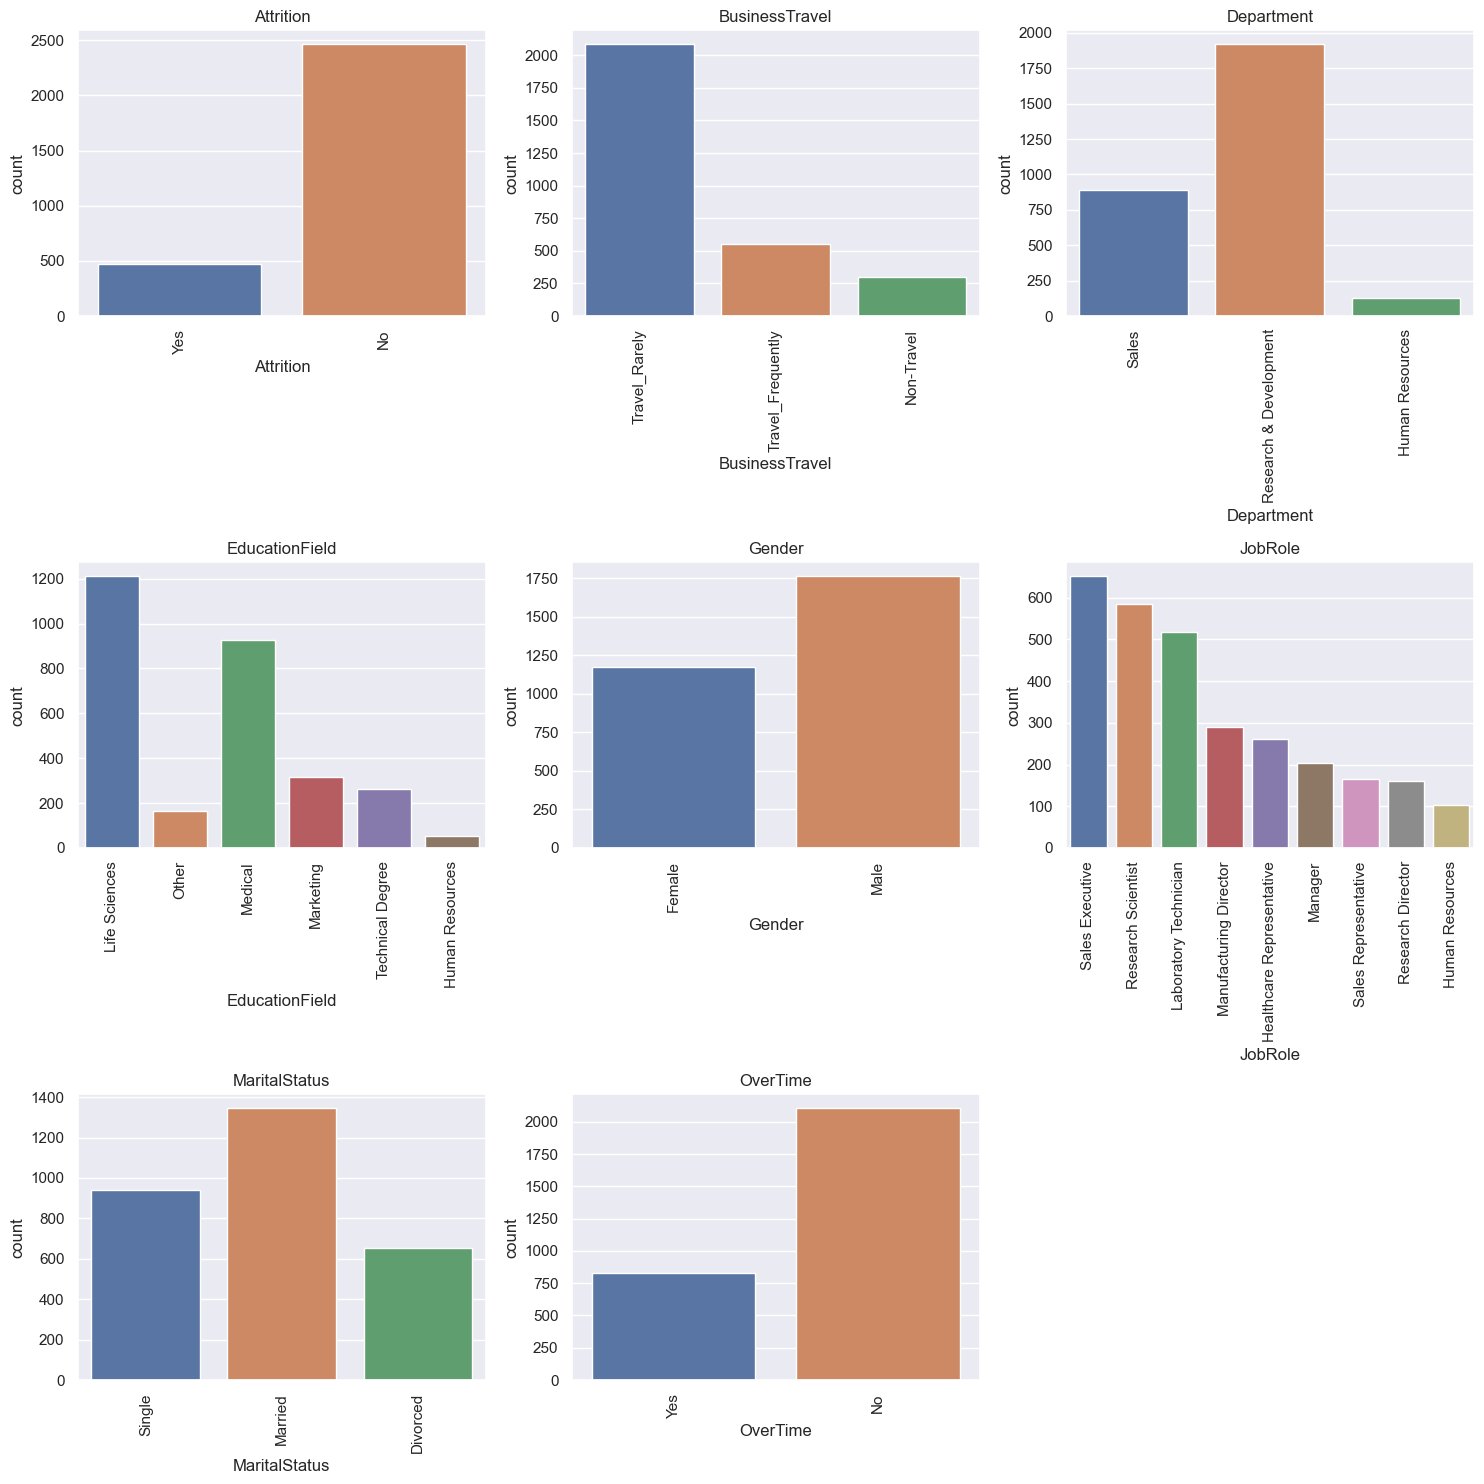

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

In [ ]:
# Create a dictionary to store unique categories and their frequencies for each column
unique_categories = {}

# Iterate over each column in the DataFrame
for col in df.columns:
    # Check if the column has object data type (categorical column)
    if df[col].dtype == 'object':
        value_counts = df[col].value_counts()
        unique_categories[col] = {
            'Categories': value_counts.index.tolist(),
            'Frequency': value_counts.values.tolist()
        }

# Display the list of unique categories and their frequencies for each column
for col, data in unique_categories.items():
    print(f"Column: {col}")
    print(pd.DataFrame(data))
    print()

Column: Attrition

  Categories  Frequency

0         No       2466

1        Yes        474



Column: BusinessTravel

          Categories  Frequency

0      Travel_Rarely       2086

1  Travel_Frequently        554

2         Non-Travel        300



Column: Department

               Categories  Frequency

0  Research & Development       1922

1                   Sales        892

2         Human Resources        126



Column: EducationField

         Categories  Frequency

0     Life Sciences       1212

1           Medical        928

2         Marketing        318

3  Technical Degree        264

4             Other        164

5   Human Resources         54



Column: Gender

  Categories  Frequency

0       Male       1764

1     Female       1176



Column: JobRole

                  Categories  Frequency

0            Sales Executive        652

1         Research Scientist        584

2      Laboratory Technician        518

3     Manufacturing Director        290

4  Heal

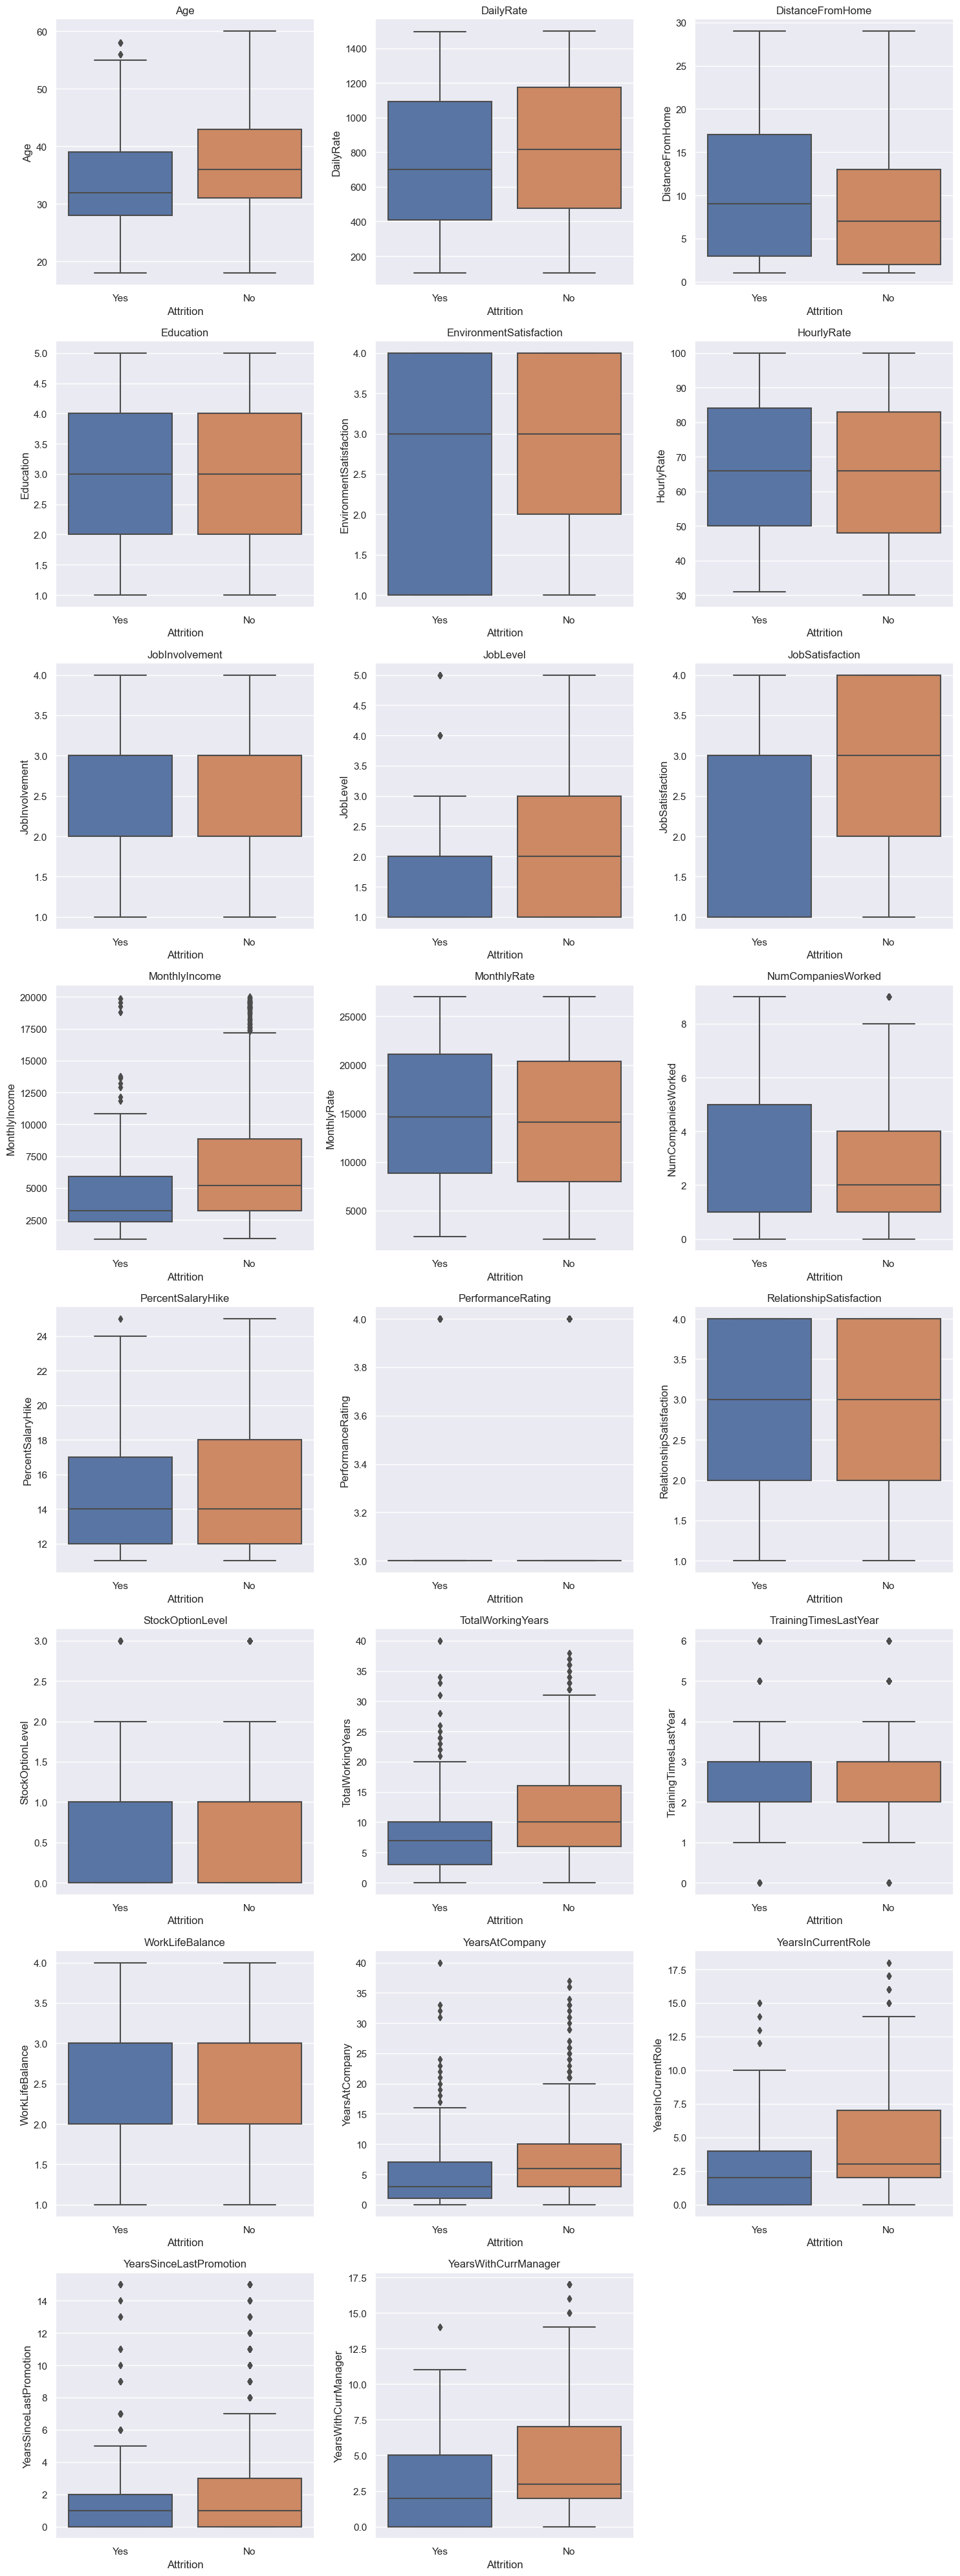

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Attrition', data=df, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

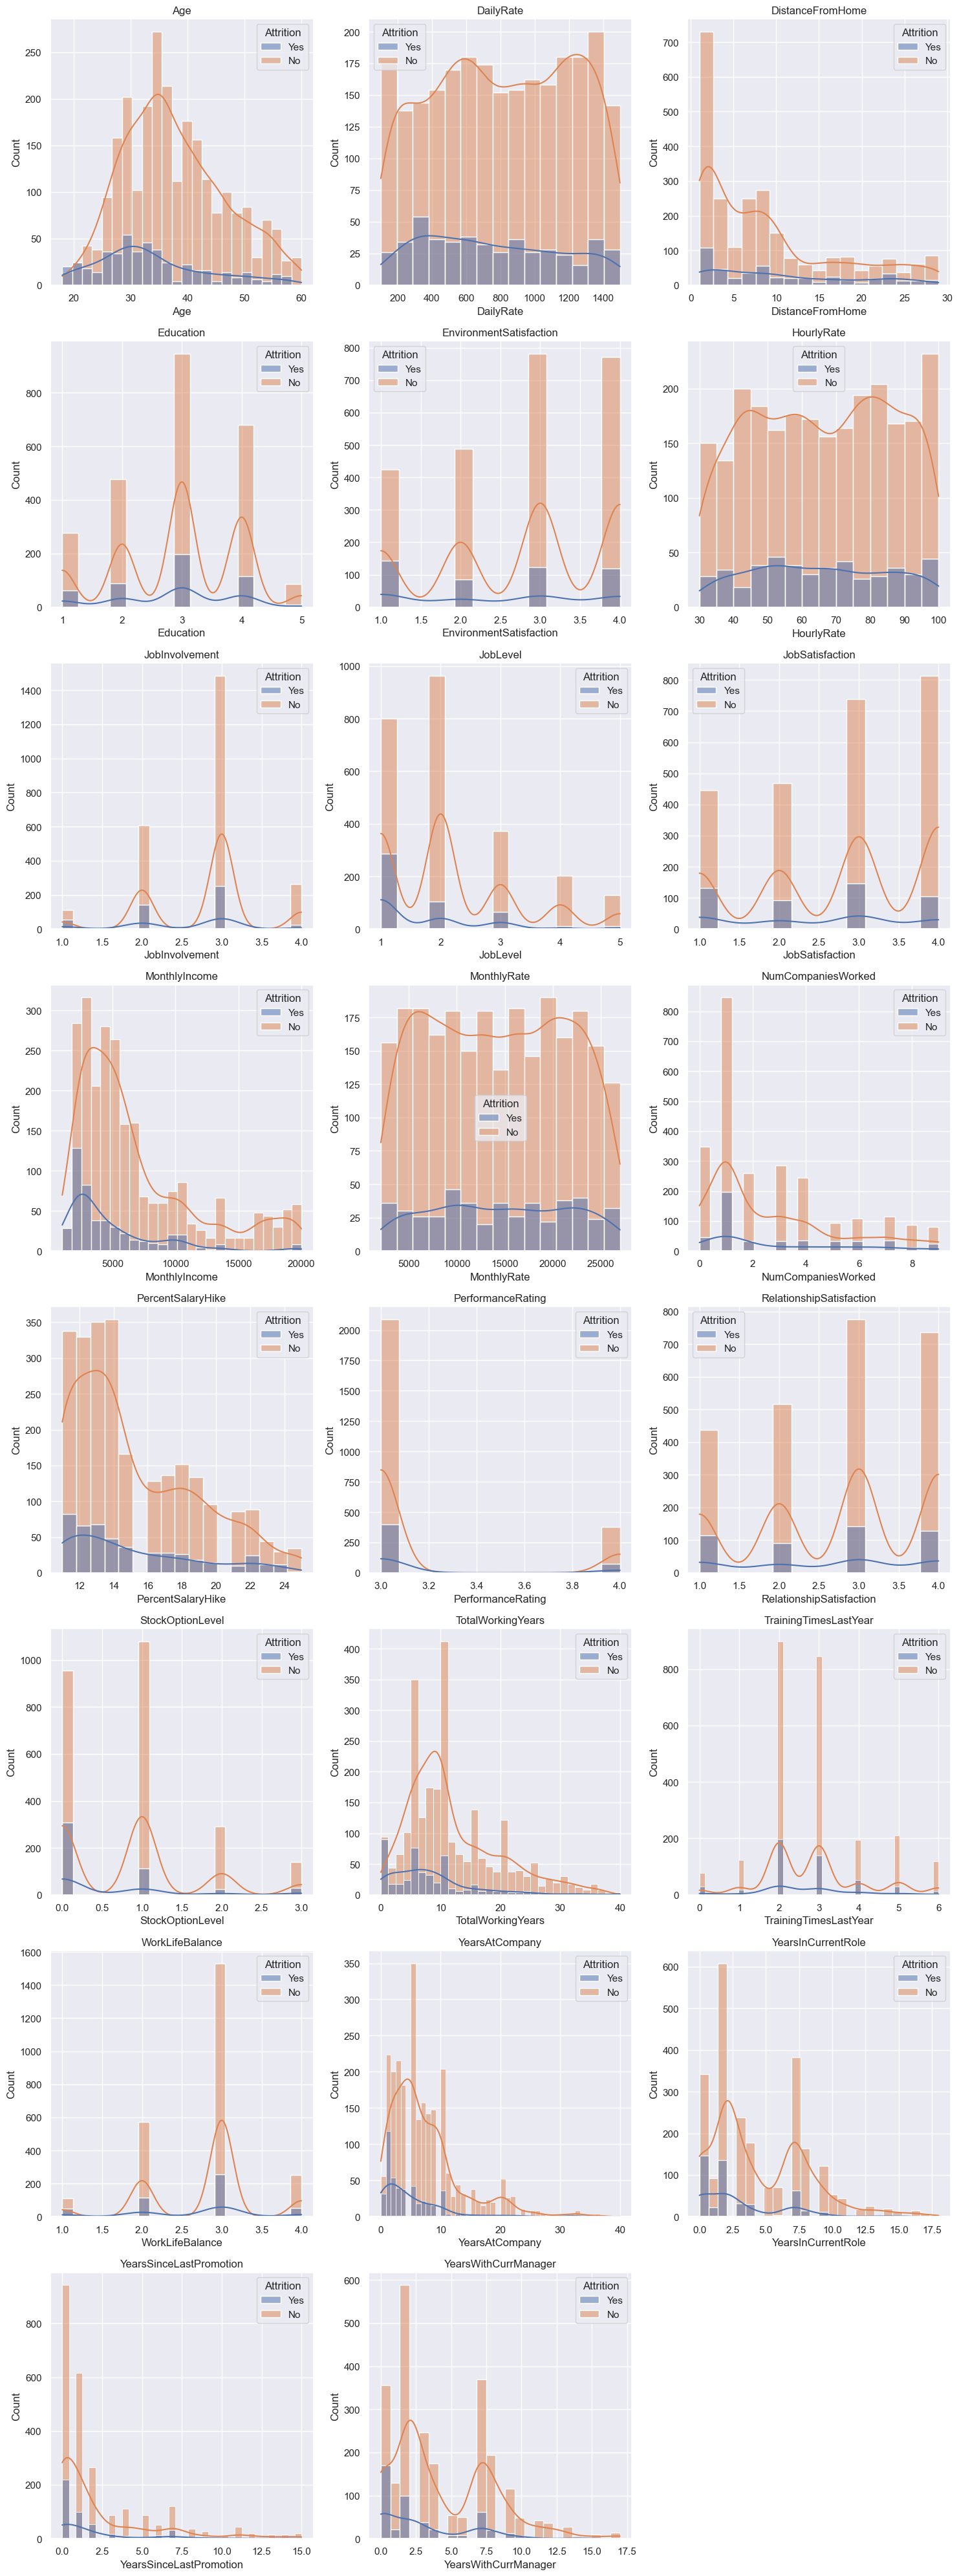

In [ ]:
# Get the names of all columns with data type 'int'
int_vars = df.select_dtypes(include='int').columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df, x=var, hue='Attrition', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

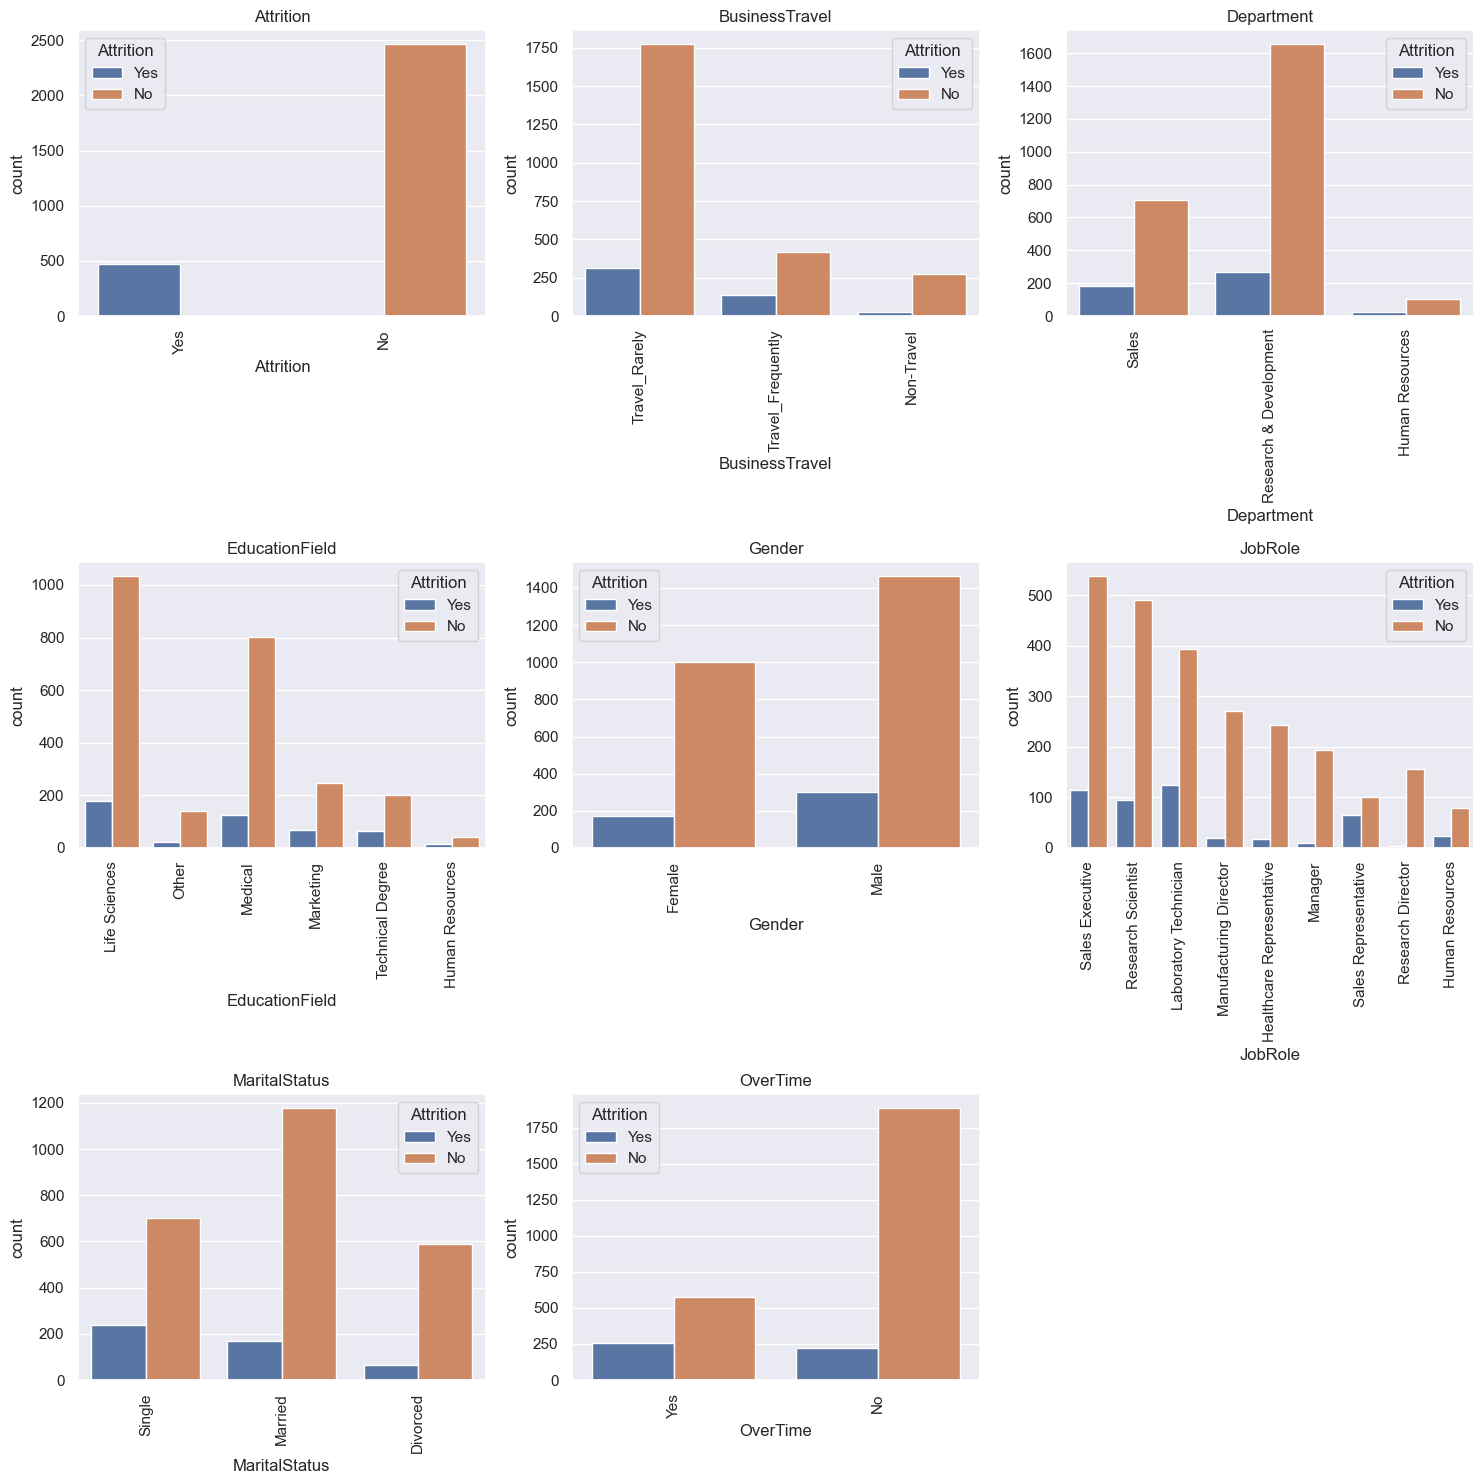

In [ ]:
# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create a figure with subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a countplot for each categorical variable using Seaborn with 'Attrition' as hue
for i, var in enumerate(cat_vars):
    sns.countplot(x=var, hue='Attrition', data=df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for readability

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()


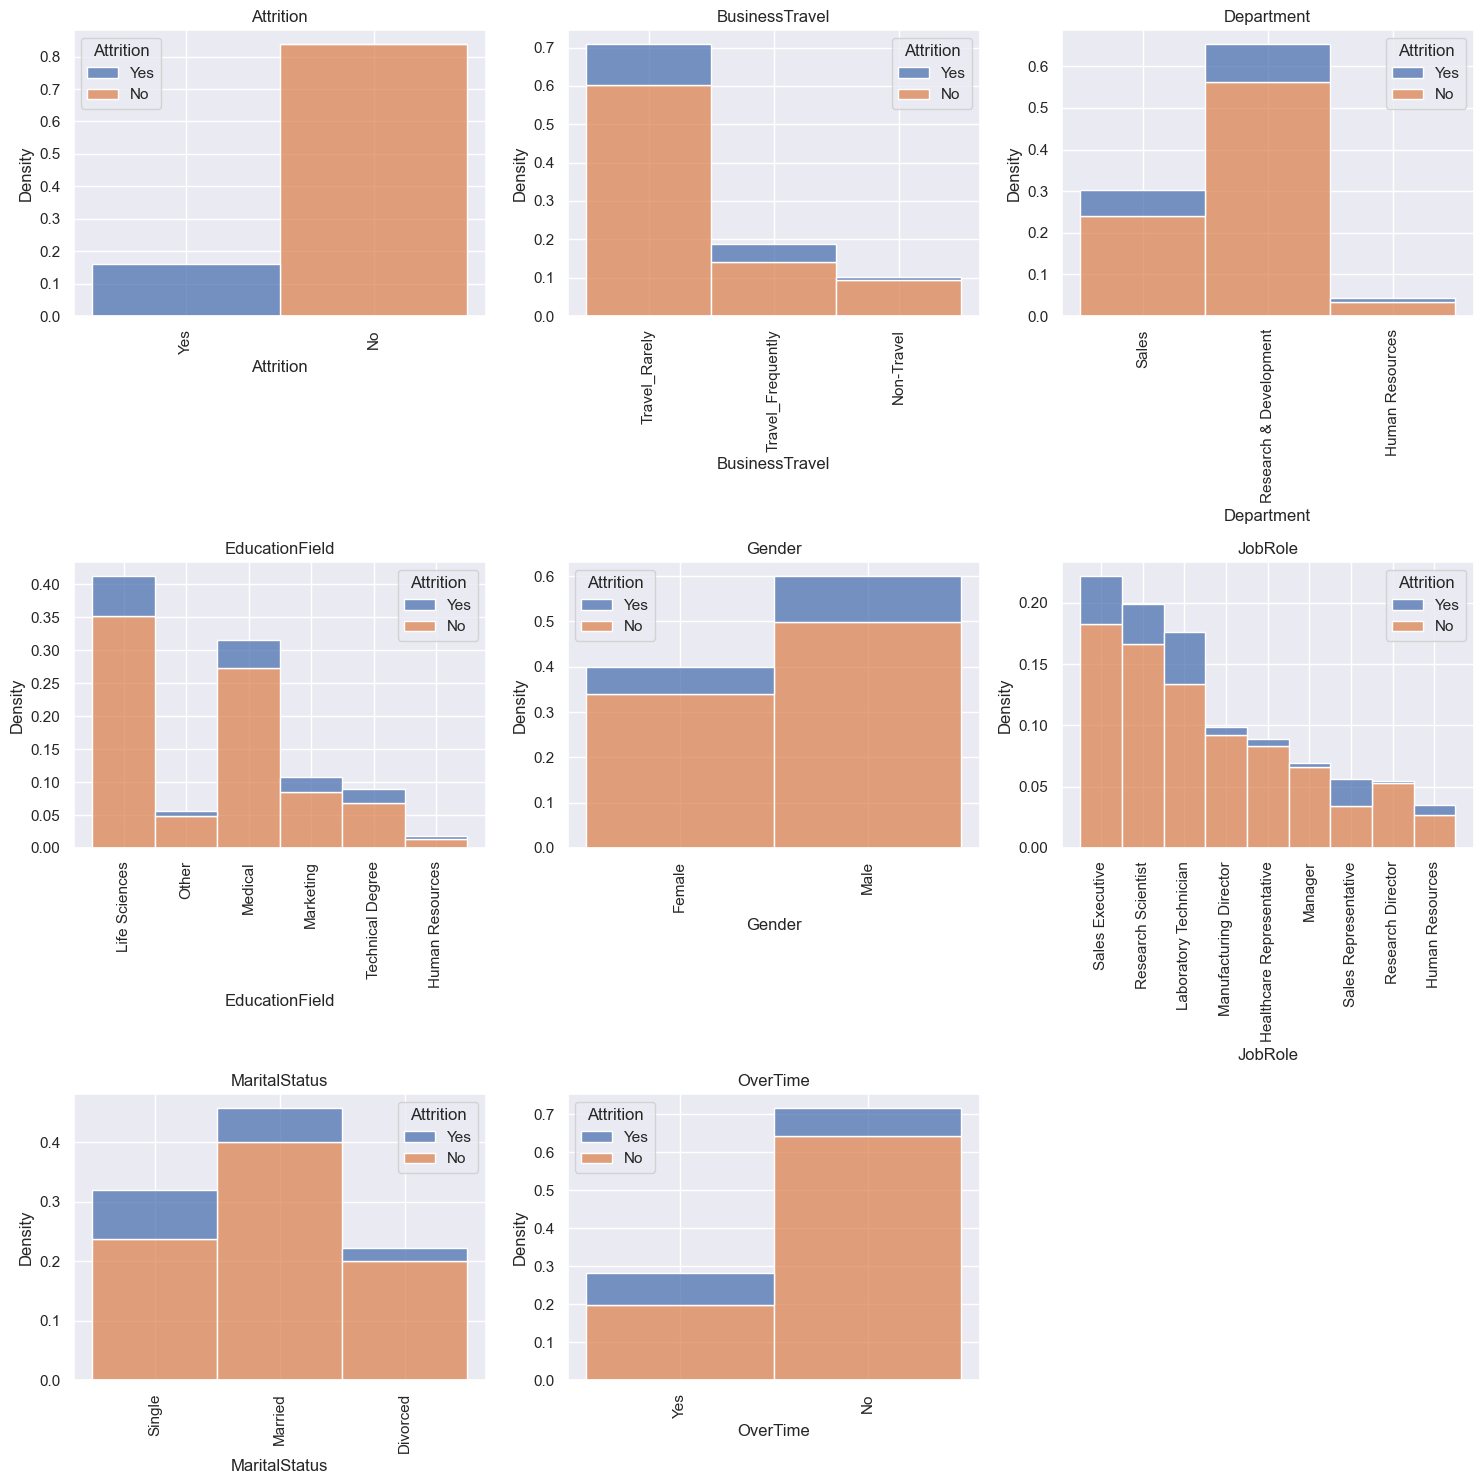

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you already have the DataFrame 'df' containing the data

# Get the names of all columns with data type 'object' (categorical columns)
cat_vars = df.select_dtypes(include='object').columns.tolist()

# Create the stacked density plot
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

for i, var in enumerate(cat_vars):
    sns.histplot(data=df, x=var, hue='Attrition', stat='density', multiple='stack', ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_ylabel('Density')
    axs[i].tick_params(axis='x', rotation=90)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

5) Perform an independent t-test (two-sided) with the following conditions:

H0: There is no difference in the mean of 'Total Working Years' between employees who left and those who stayed (use the 'Attrition' column as reference).

H1: There is a difference in the mean of 'Total Working Years' between employees who left and those who stayed (use the 'Attrition' column as reference).

alpha = 5%

Print the t-test results and write the conclusion.

In [ ]:
from scipy.stats import ttest_ind

# Extract 'Total Working Years' for employees who left (Attrition = 'Yes') and stayed (Attrition = 'No')
working_years_left = df[df['Attrition'] == 'Yes']['TotalWorkingYears']
working_years_stayed = df[df['Attrition'] == 'No']['TotalWorkingYears']

# Perform the independent t-test
alpha = 0.05
t_statistic, p_value = ttest_ind(working_years_left, working_years_stayed)

# Print the results
print("Independent T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

Independent T-Test Results:

T-Statistic: -9.410912409729871

P-Value: 9.603230829038466e-21


In [ ]:
Result: P-Value > alpha
Reject the null hypothesis (H0). There is a significant difference in the mean 'Total Working Years' between employees who left and employees who stayed.

(6) Perform a one-way ANOVA with the following conditions:

H0: There is no difference in the mean 'Age' among employees from the 3 departments present in the dataset.

H1: At least two departments have different mean ages of their employees.

Print the one-way ANOVA results and write the conclusion.

In [ ]:
from scipy.stats import f_oneway

# Extract 'Age' for employees from each department
age_Sales = df[df['Department'] == 'Sales']['Age']
age_Research_Development = df[df['Department'] == 'Research & Development']['Age']
age_Human_Resources = df[df['Department'] == 'Human Resources']['Age']

# Perform the one-way ANOVA
alpha = 0.05
f_statistic, p_value = f_oneway(age_Sales, age_Research_Development, age_Human_Resources)

# Print the results
print("One-Way ANOVA Results:")
print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

One-Way ANOVA Results:

F-Statistic: 1.5325718311968073

P-Value: 0.21615216157151168


In [ ]:
Result: p_value > alpha
Null hypothesis (H0) is accepted. There is no significant difference in the mean 'Age' among employees from the three departments.





# Classification

(8) Perform necessary feature engineering on the training set: imputation, encoding, scaling, selection, etc. Perform similar transformations on the test set without re-fitting.

In [ ]:
#Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [ ]:
# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Print the column name and the unique values
    print(f"{col}: {df[col].unique()}")

Attrition: ['Yes' 'No']

BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department: ['Sales' 'Research & Development' 'Human Resources']

EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'

 'Human Resources']

Gender: ['Female' 'Male']

JobRole: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'

 'Manufacturing Director' 'Healthcare Representative' 'Manager'

 'Sales Representative' 'Research Director' 'Human Resources']

MaritalStatus: ['Single' 'Married' 'Divorced']

OverTime: ['Yes' 'No']


In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df[col].unique())

    # Transform the column using the encoder
    df[col] = label_encoder.transform(df[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df[col].unique()}")

Attrition: [1 0]

BusinessTravel: [2 1 0]

Department: [2 1 0]

EducationField: [1 4 3 2 5 0]

Gender: [0 1]

JobRole: [7 6 2 4 0 3 8 5 1]

MaritalStatus: [2 1 0]

OverTime: [1 0]


<AxesSubplot:>

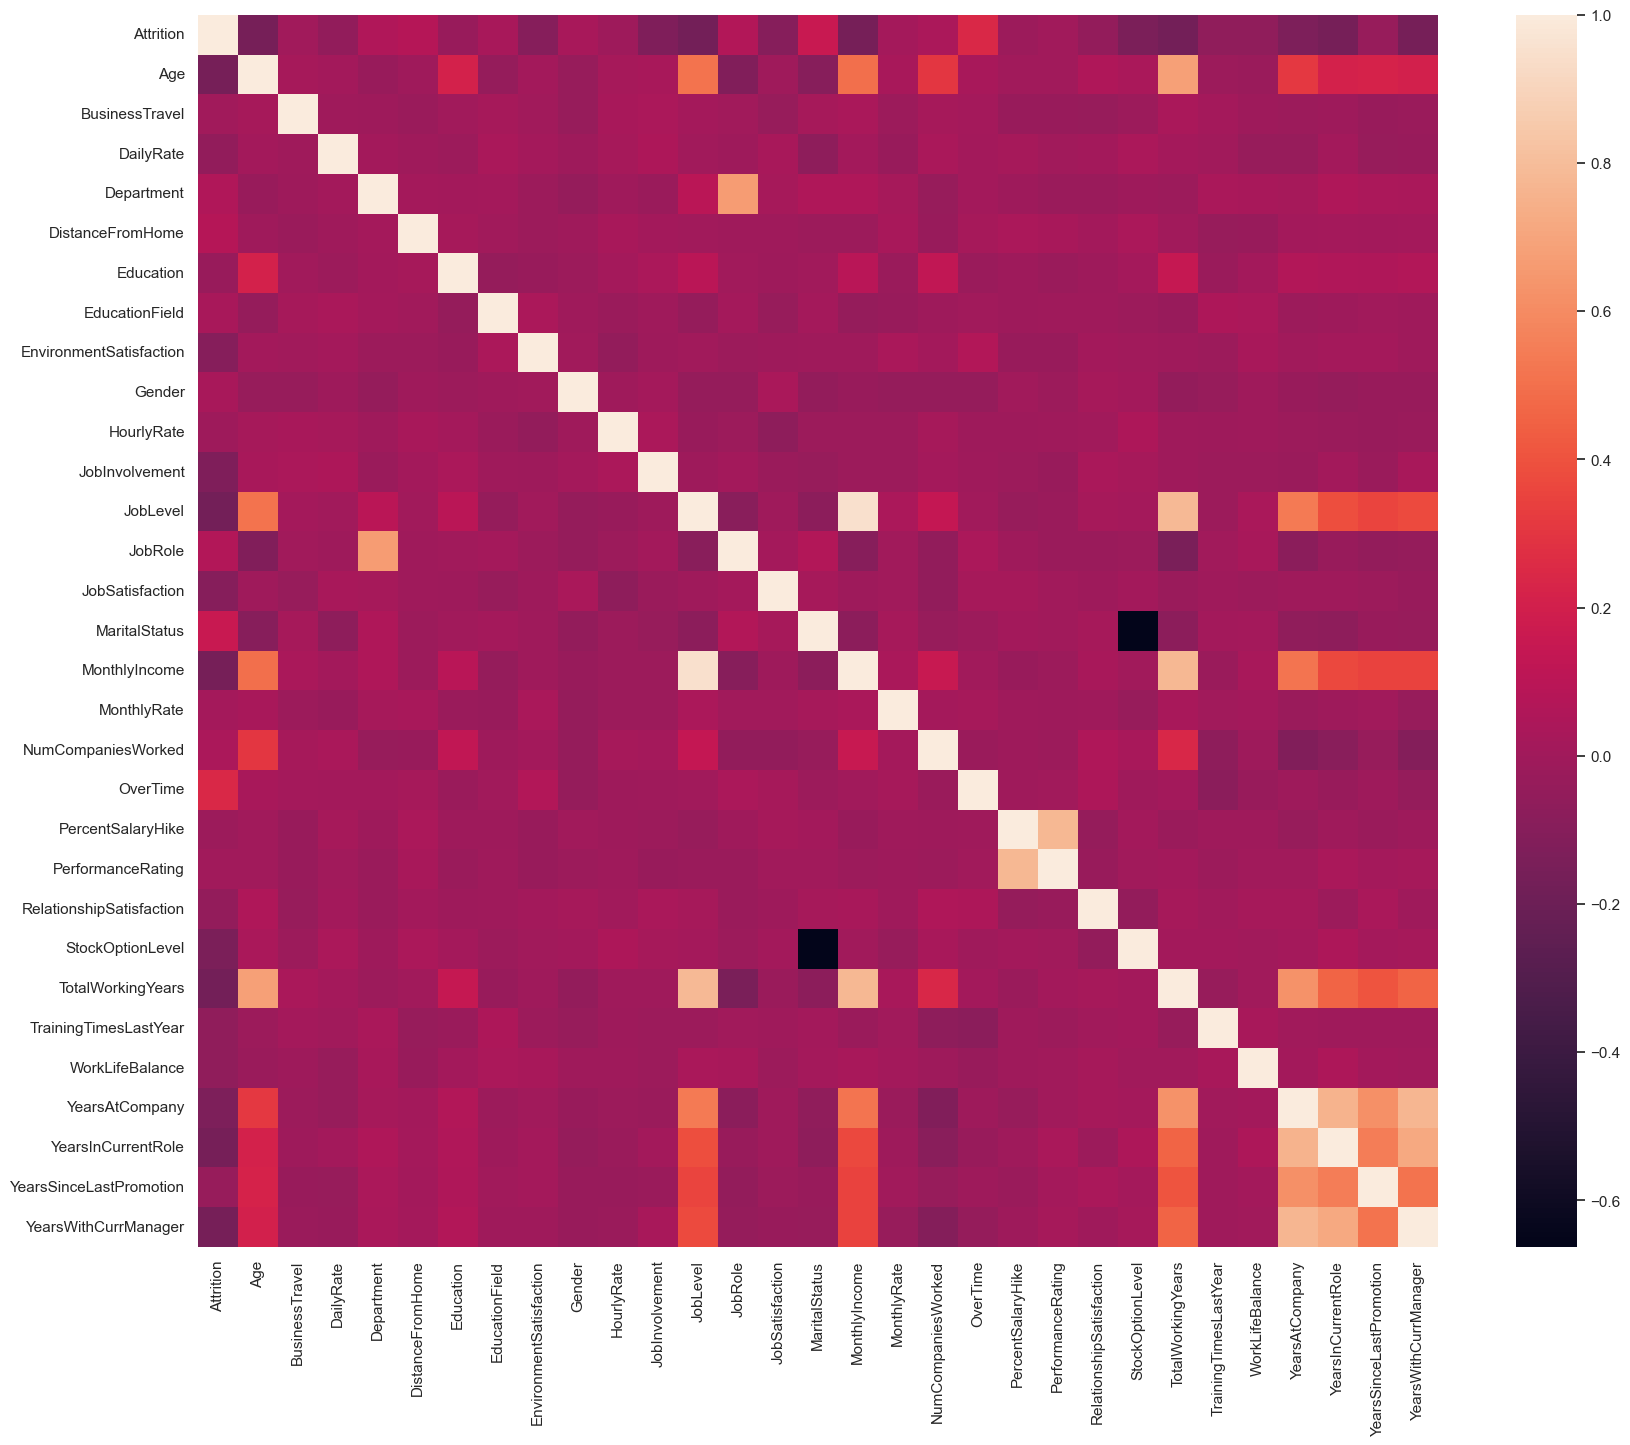

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), fmt='.2g')

(9) Prepare the dataset for classification. Set the 'Attrition' column as the target variable (y). Drop all columns that are considered unnecessary.

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

(10) Perform a train-test split with a test size of 20% (test:test = 4:1), while ensuring that the class distribution in the target variable 'y' is maintained (stratify = y). Next, identify and remove outliers using the Z-Score method.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['MonthlyIncome', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

(11) Prepare 3 estimators: Perform cross-validation using the estimators Logistic Regression, Decision Tree Classifier, and XGBoost Classifier (if unable to install XGBoost, please choose another classifier to replace) to determine the optimal values for various hyperparameters for each estimator.

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


# Estimator 1: Logistic Regression
lr_classifier = LogisticRegression(solver='liblinear', random_state=42)
lr_params = {'C': [0.1, 1.0, 10.0]}

# Estimator 2: Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_params = {'max_depth': [None, 5, 10, 15]}

# Estimator 3: XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=42)
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Cross-validation untuk Logistic Regression
lr_grid_search = GridSearchCV(lr_classifier, lr_params, cv=5, scoring='accuracy')
lr_grid_search.fit(X_train, y_train)
print("Logistic Regression - Best Parameters:", lr_grid_search.best_params_)
print("Logistic Regression - Best Cross-validation Score:", lr_grid_search.best_score_)

# Cross-validation untuk Decision Tree Classifier
dt_grid_search = GridSearchCV(dt_classifier, dt_params, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)
print("Decision Tree Classifier - Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Classifier - Best Cross-validation Score:", dt_grid_search.best_score_)

# Cross-validation untuk XGBoost Classifier
xgb_grid_search = GridSearchCV(xgb_classifier, xgb_params, cv=5, scoring='accuracy')
xgb_grid_search.fit(X_train, y_train)
print("XGBoost Classifier - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Classifier - Best Cross-validation Score:", xgb_grid_search.best_score_)

Logistic Regression - Best Parameters: {'C': 1.0}

Logistic Regression - Best Cross-validation Score: 0.8689917871718646

Decision Tree Classifier - Best Parameters: {'max_depth': None}

Decision Tree Classifier - Best Cross-validation Score: 0.920587494331637

XGBoost Classifier - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

XGBoost Classifier - Best Cross-validation Score: 0.9484042928402276


(12) Fit all three estimators using the training set. Print classification reports for both the training set and the test set for each of the three estimators.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=8, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=8, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 84.18 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8418367346938774

Precision Score :  0.8418367346938775

Recall Score :  0.8418367346938775

Jaccard Score :  0.7268722466960352

Log Loss :  5.462874443063112


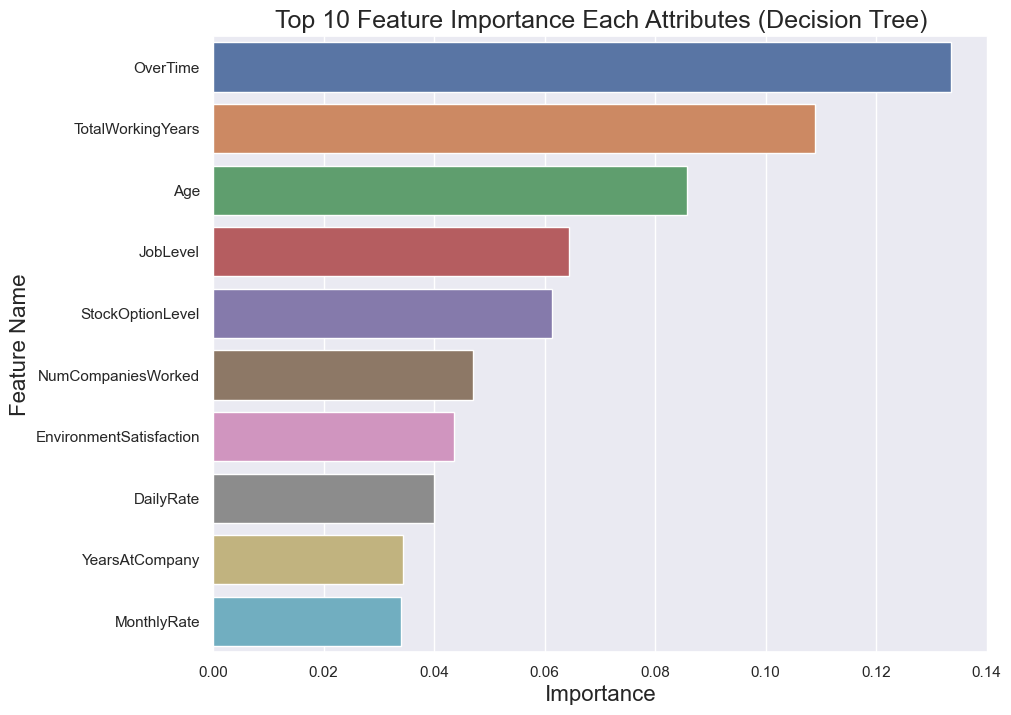

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

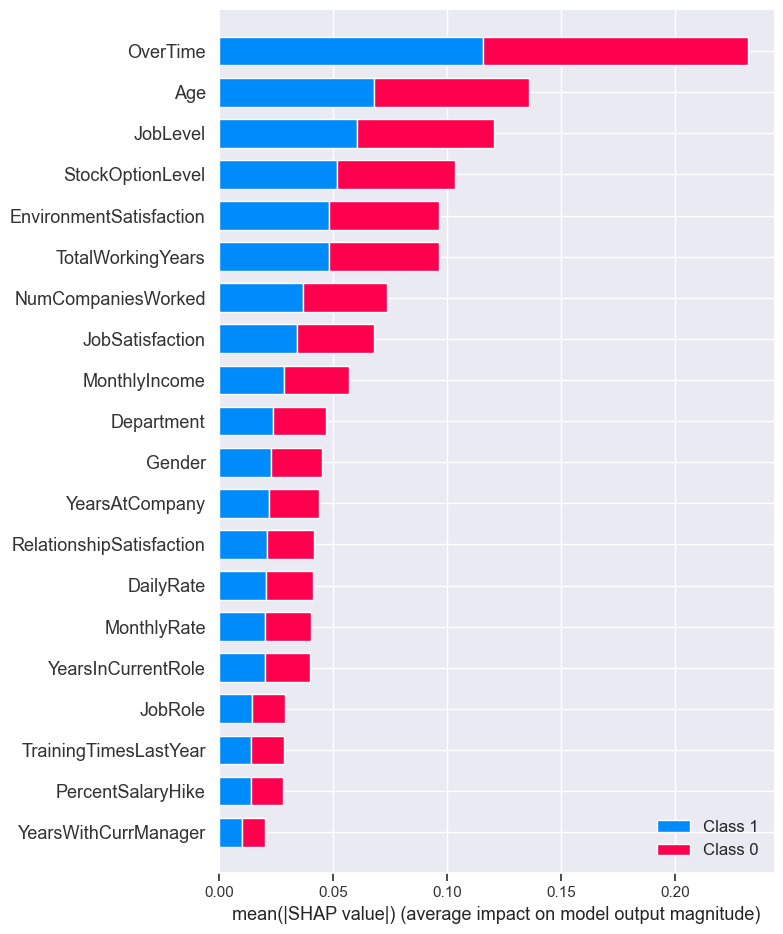

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

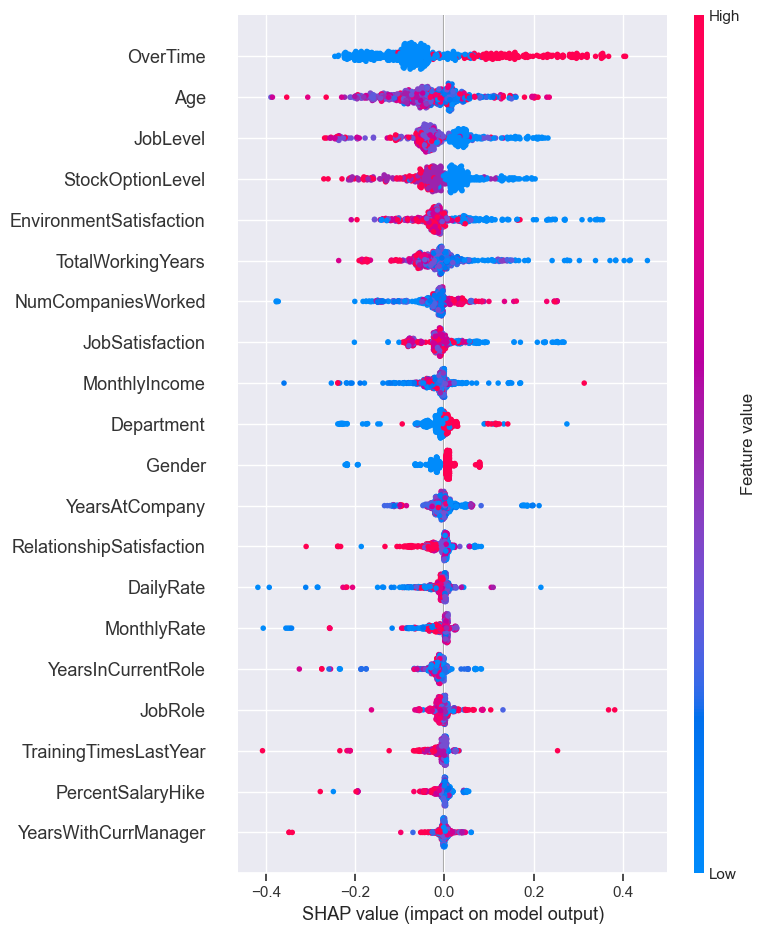

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8418367346938775')

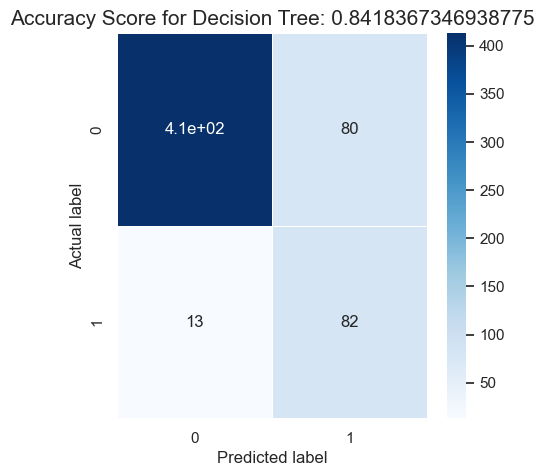

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

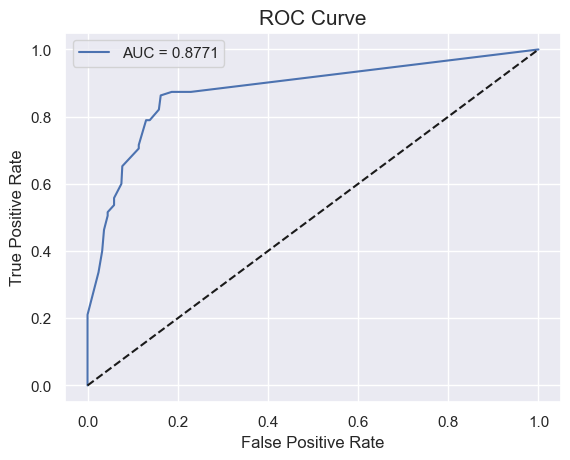

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, max_depth=None, max_features='sqrt', n_estimators=100, class_weight='balanced')
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       random_state=42)

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.28 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9727891156462585

Precision Score :  0.9727891156462585

Recall Score :  0.9727891156462585

Jaccard Score :  0.9470198675496688

Log Loss :  0.9398306502016522


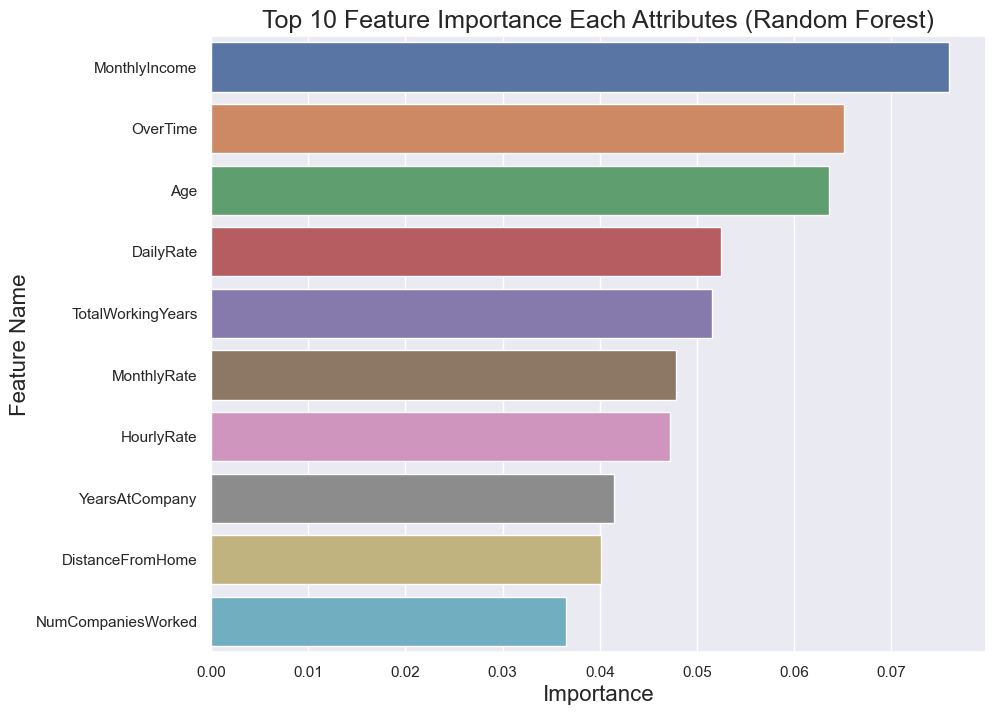

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

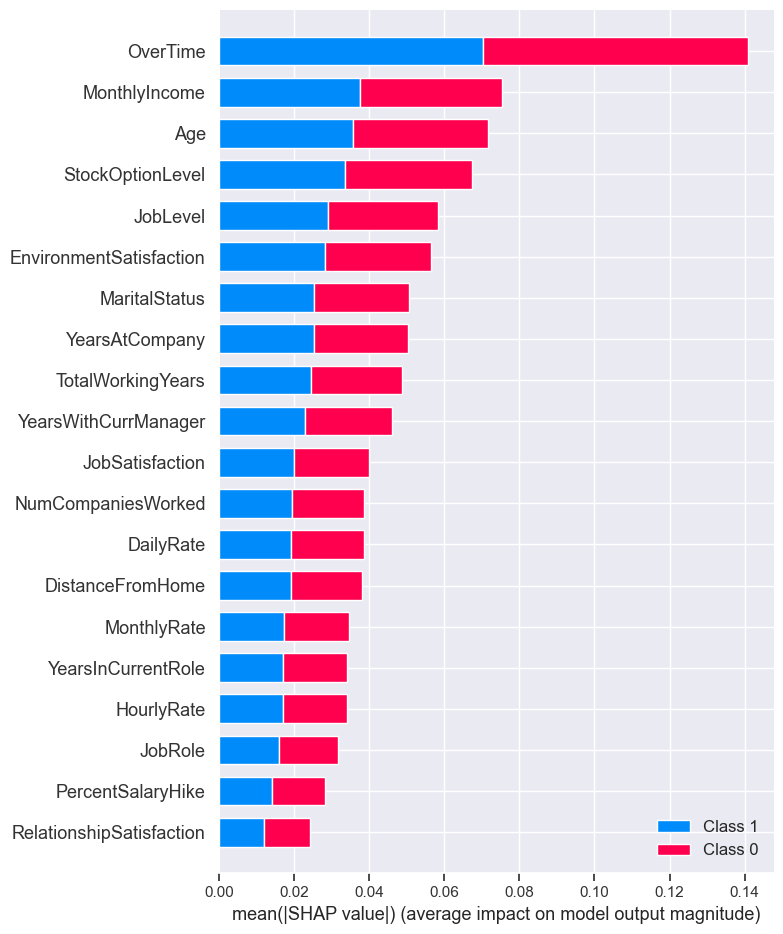

In [ ]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

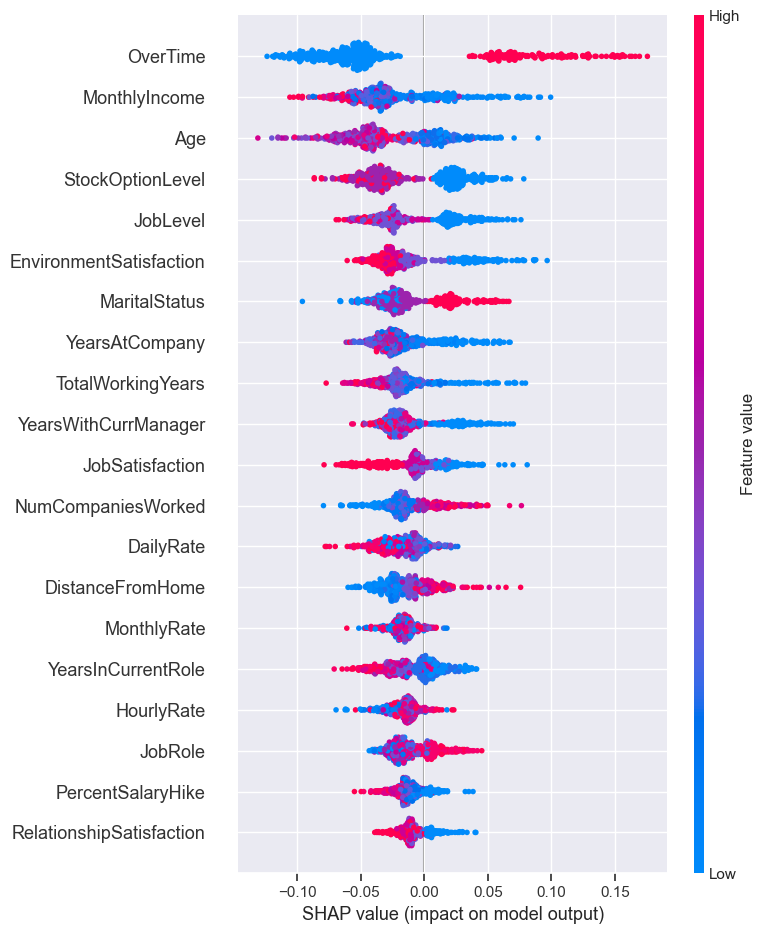

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.9727891156462585')

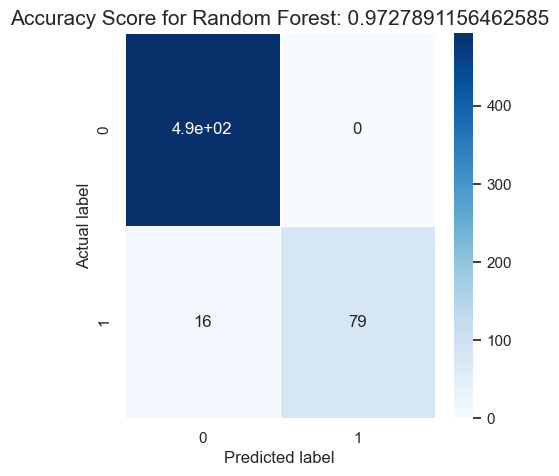

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

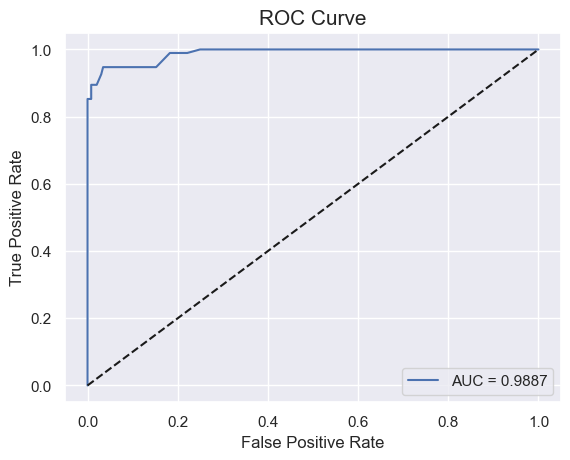

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'gamma': [0, 0.1, 0.2]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'gamma': 0.2, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=200)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 97.28 %


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.9727891156462585

Precision Score :  0.9727891156462585

Recall Score :  0.9727891156462585

Jaccard Score :  0.9470198675496688

Log Loss :  0.9398333699208025


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


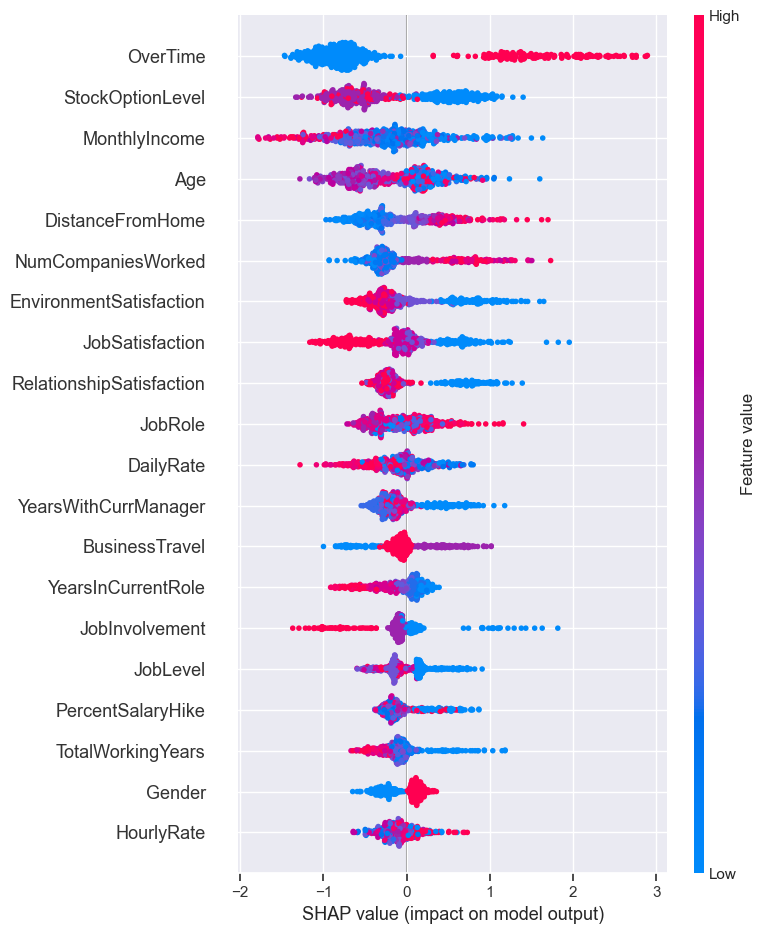

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Text(0.5, 1.0, 'Accuracy Score for XGBoost: 0.9727891156462585')

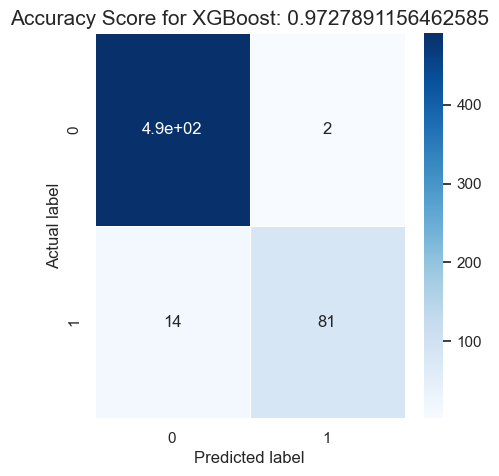

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for XGBoost: {0}'.format(xgb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

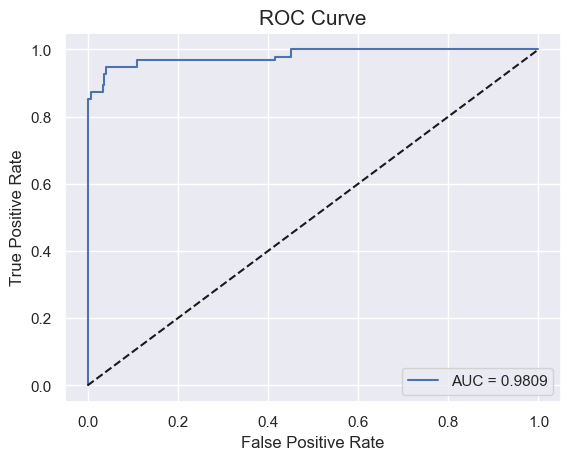

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

(13) Based on the performance results you obtained, which estimator performs the best?

In [ ]:

XGBoost achieved the best results.

# Regression

(14) Prepare the dataset for regression. Set the 'MonthlyIncome' column as the target variable.

In [ ]:
df1 = pd.read_csv('employee.csv')
df1.head()

Unnamed: 0  EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0           0               1       Yes   41      Travel_Rarely       1102   
1           1               2        No   49  Travel_Frequently        279   
2           2               3       Yes   37      Travel_Rarely       1373   
3           3               4        No   33  Travel_Frequently       1392   
4           4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
#Drop kolom Unnamed:0 ,EmployeeNumber, dan StandardHours, Over18, Performance Rating
df1.drop(columns=['EmployeeNumber', 'StandardHours','Over18', 'PerformanceRating'], inplace=True)

In [ ]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df1.select_dtypes(include=['object']).columns:

    # Initialize a LabelEncoder object
    label_encoder = preprocessing.LabelEncoder()

    # Fit the encoder to the unique values in the column
    label_encoder.fit(df1[col].unique())

    # Transform the column using the encoder
    df1[col] = label_encoder.transform(df1[col])

    # Print the column name and the unique encoded values
    print(f"{col}: {df1[col].unique()}")

Attrition: [1 0]

BusinessTravel: [2 1 0]

Department: [2 1 0]

EducationField: [1 4 3 2 5 0]

Gender: [0 1]

JobRole: [7 6 2 4 0 3 8 5 1]

MaritalStatus: [2 1 0]

OverTime: [1 0]


(15) Split trainset dan testset. test size = 0.2.

In [ ]:
X = df1.drop('MonthlyIncome', axis=1)
y = df1['MonthlyIncome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


(16) Perform the necessary transformations on the training set. Apply the same transformations to the test set without re-fitting.

In [ ]:
from scipy import stats

# Define the columns for which you want to remove outliers
selected_columns = ['StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

# Calculate the Z-scores for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# Set a threshold value for outlier detection (e.g., 3)
threshold = 3

# Find the indices of outliers based on the threshold
outlier_indices = np.where(z_scores > threshold)[0]

# Remove the outliers from the training data
X_train = X_train.drop(X_train.index[outlier_indices])
y_train = y_train.drop(y_train.index[outlier_indices])

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Regressor 1: Linear/Polynomial Regression
linear_regressor = LinearRegression()
poly_regressor = LinearRegression()

# Menambahkan fitur polinomial (order 2)
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.transform(X_test)

# Cross-validation untuk Linear Regression
linear_scores = cross_val_score(linear_regressor, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
linear_rmse = np.sqrt(-linear_scores.mean())

# Cross-validation untuk Polynomial Regression
poly_scores = cross_val_score(poly_regressor, X_train_poly, y_train, cv=5, scoring='neg_mean_squared_error')
poly_rmse = np.sqrt(-poly_scores.mean())

print("Linear Regression - Cross-validation RMSE:", linear_rmse)
print("Polynomial Regression - Cross-validation RMSE:", poly_rmse)

# Regressor 2: Decision Tree/Random Forest/XGBoost Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = XGBRegressor(random_state=42)

# Hyperparameter grid for Decision Tree Regressor
dt_params = {
    'max_depth': [2, 4, 6, 8, None],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Hyperparameter grid for Random Forest Regressor
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter grid for XGBoost Regressor
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Hyperparameter grid for Polynomial Regression
poly_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# Hyperparameter grid for Linear Regression
linear_params = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

# GridSearchCV for Decision Tree Regressor
dt_grid_search = GridSearchCV(dt_regressor, dt_params, cv=5, scoring='neg_mean_squared_error')
dt_grid_search.fit(X_train, y_train)
print("Decision Tree Regressor - Best Parameters:", dt_grid_search.best_params_)
print("Decision Tree Regressor - Best Cross-validation RMSE:", np.sqrt(-dt_grid_search.best_score_))

# GridSearchCV for Random Forest Regressor
rf_grid_search = GridSearchCV(rf_regressor, rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
print("Random Forest Regressor - Best Parameters:", rf_grid_search.best_params_)
print("Random Forest Regressor - Best Cross-validation RMSE:", np.sqrt(-rf_grid_search.best_score_))

# GridSearchCV for XGBoost Regressor
xgb_grid_search = GridSearchCV(xgb_regressor, xgb_params, cv=5, scoring='neg_mean_squared_error')
xgb_grid_search.fit(X_train, y_train)
print("XGBoost Regressor - Best Parameters:", xgb_grid_search.best_params_)
print("XGBoost Regressor - Best Cross-validation RMSE:", np.sqrt(-xgb_grid_search.best_score_))

# GridSearchCV for Polynomial Regression
poly_grid_search = GridSearchCV(poly_regressor, poly_params, cv=5, scoring='neg_mean_squared_error')
poly_grid_search.fit(X_train_poly, y_train)
print("Polynomial Regression - Best Parameters:", poly_grid_search.best_params_)
print("Polynomial Regression - Best Cross-validation RMSE:", np.sqrt(-poly_grid_search.best_score_))

# GridSearchCV for Linear Regression
linear_grid_search = GridSearchCV(linear_regressor, linear_params, cv=5, scoring='neg_mean_squared_error')
linear_grid_search.fit(X_train, y_train)
print("Linear Regression - Best Parameters:", linear_grid_search.best_params_)
print("Linear Regression - Best Cross-validation RMSE:", np.sqrt(-linear_grid_search.best_score_))


Linear Regression - Cross-validation RMSE: 1427.1411766484027

Polynomial Regression - Cross-validation RMSE: 1343.8756800941414

Decision Tree Regressor - Best Parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2}

Decision Tree Regressor - Best Cross-validation RMSE: 957.7847354845344

Random Forest Regressor - Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}

Random Forest Regressor - Best Cross-validation RMSE: 771.722383955201

XGBoost Regressor - Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}

XGBoost Regressor - Best Cross-validation RMSE: 697.8449396985632


'normalize' was deprecated in version 1.0 and will be removed in 1.2.

If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



from sklearn.pipeline import make_pipeline



model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())



If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:



kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}

model.fit(X, y, **kwargs)





'normalize' was deprecated in version 1.0 and will be removed in 1.2.

If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



from sklearn.pipeline import make_pipeline



model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())



If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline

Polynomial Regression - Best Parameters: {'fit_intercept': True, 'normalize': False}

Polynomial Regression - Best Cross-validation RMSE: 1343.8756800941414

Linear Regression - Best Parameters: {'fit_intercept': True, 'normalize': False}

Linear Regression - Best Cross-validation RMSE: 1427.1411766484027


'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.

'normalize' was deprecated in version 1.0 and will be removed in 1.2.

If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:



from sklearn.pipeline import make_pipeline



model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())



If you wish to pass a sample_weight parameter, you need 

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=0, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_features='auto', random_state=0)

In [ ]:
from sklearn import metrics
import math
y_pred = dtree.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 292.7925170068027

MSE is 634641.6462585034

R2 score is 0.9702266843163408

RMSE score is 796.6439896581807


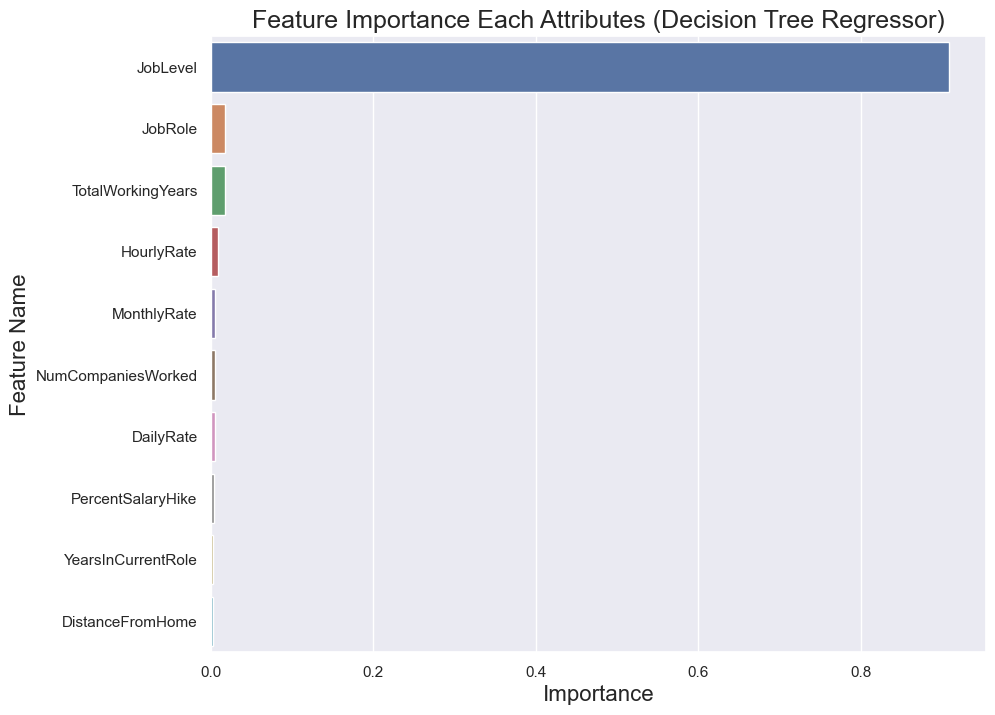

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

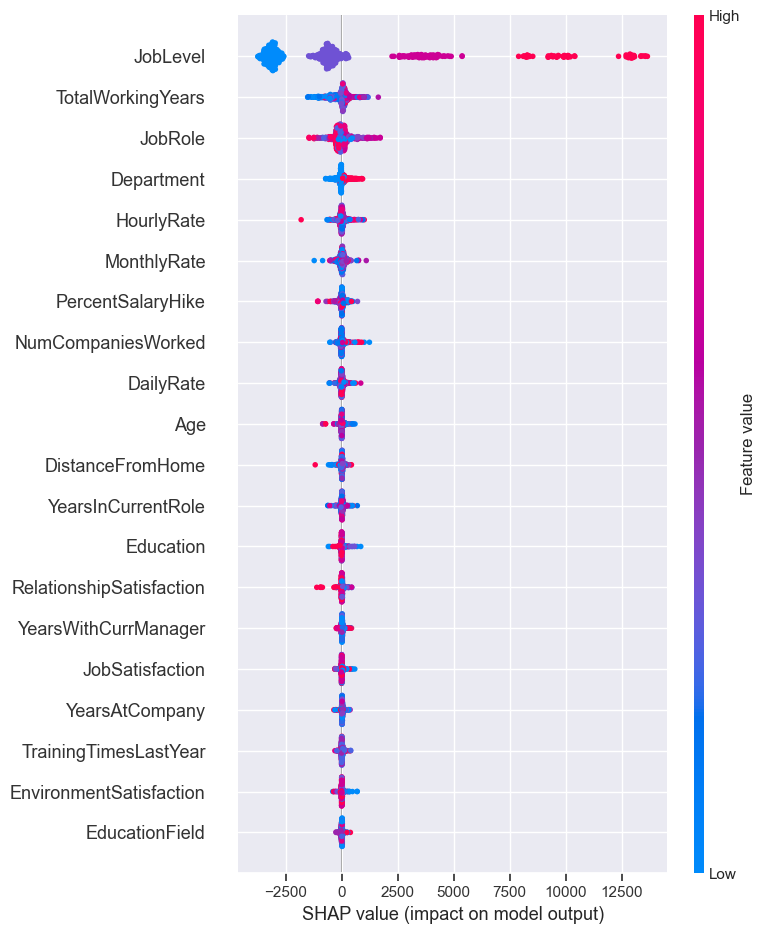

In [ ]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

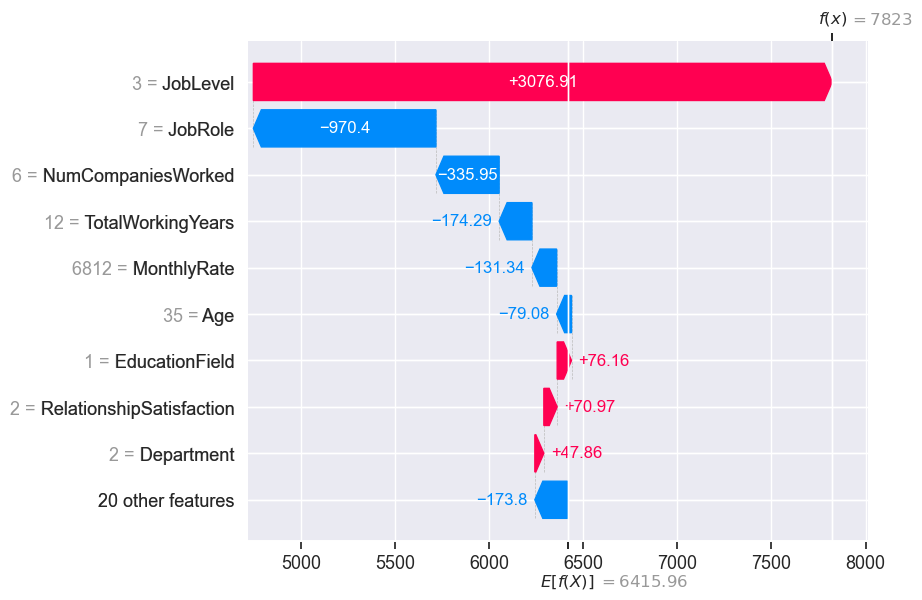

In [ ]:
explainer = shap.Explainer(dtree, X_test)
shap_values = explainer(X_test)
shap.plots.waterfall(shap_values[0])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0, max_depth=None, min_samples_split=2, n_estimators= 100)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = rf.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 436.4311224489796

MAPE is 0.09038355692326616

MSE is 416579.5968489796

R2 score is 0.9804567571046163

RMSE score is 645.4297768533612


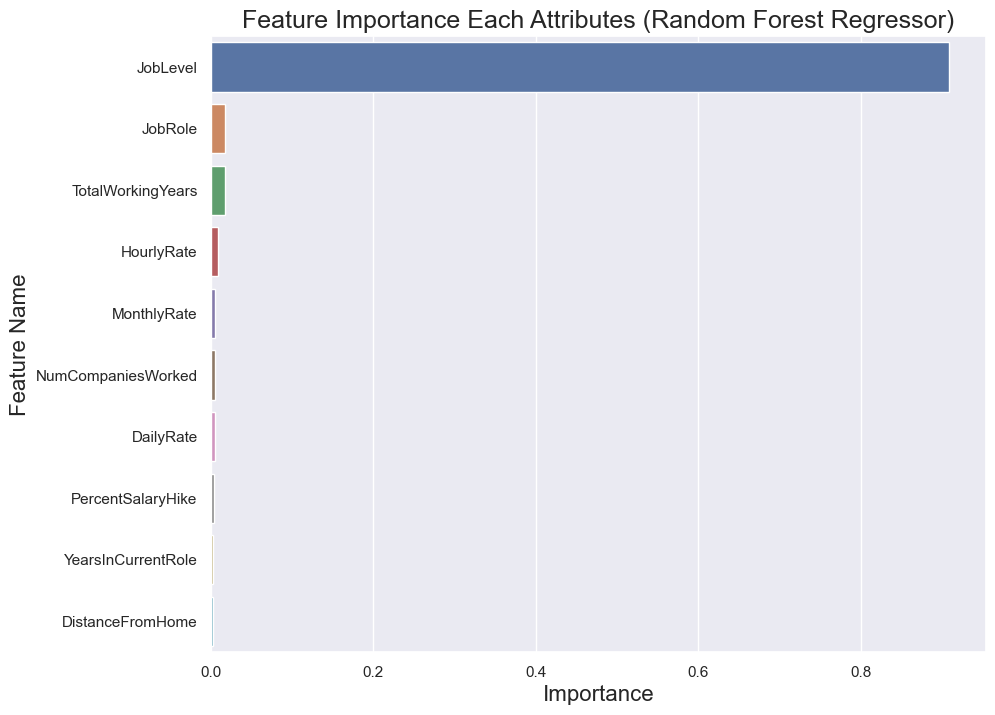

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

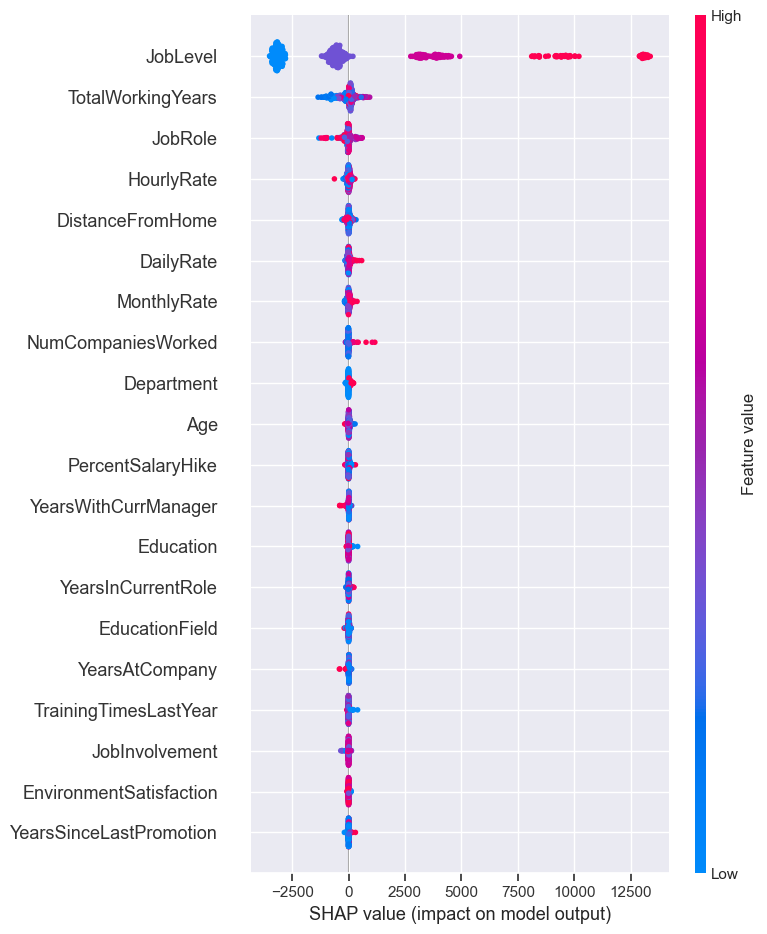

In [ ]:
import shap
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

 96%|=================== | 563/588 [00:16<00:00]       

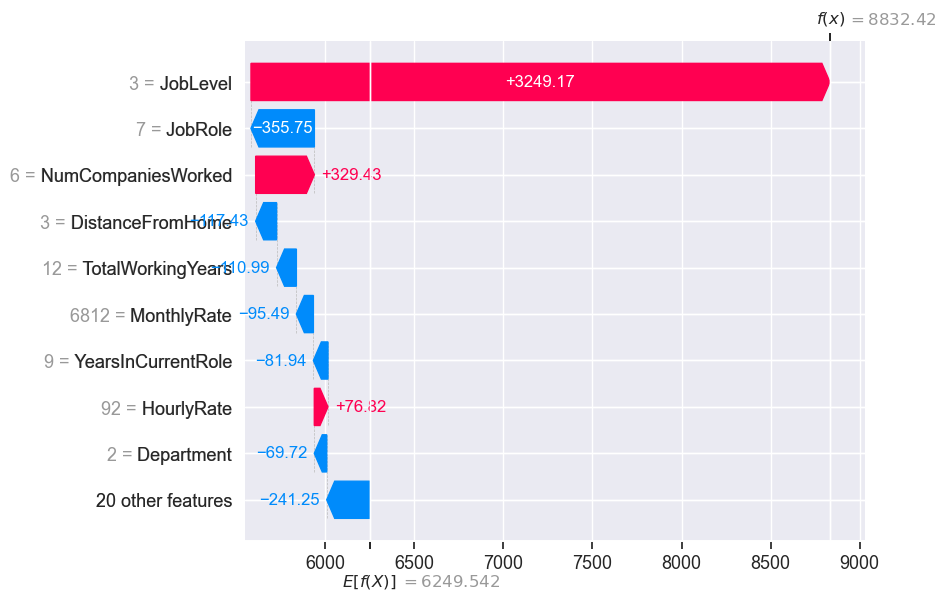

In [ ]:
explainer = shap.Explainer(rf, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

In [ ]:
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 150)
xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = xgb_regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 296.28012770049423

MAPE is 0.06149335497811747

MSE is 317105.3773736848

R2 score is 0.9851234494912315

RMSE score is 563.1211036479496


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


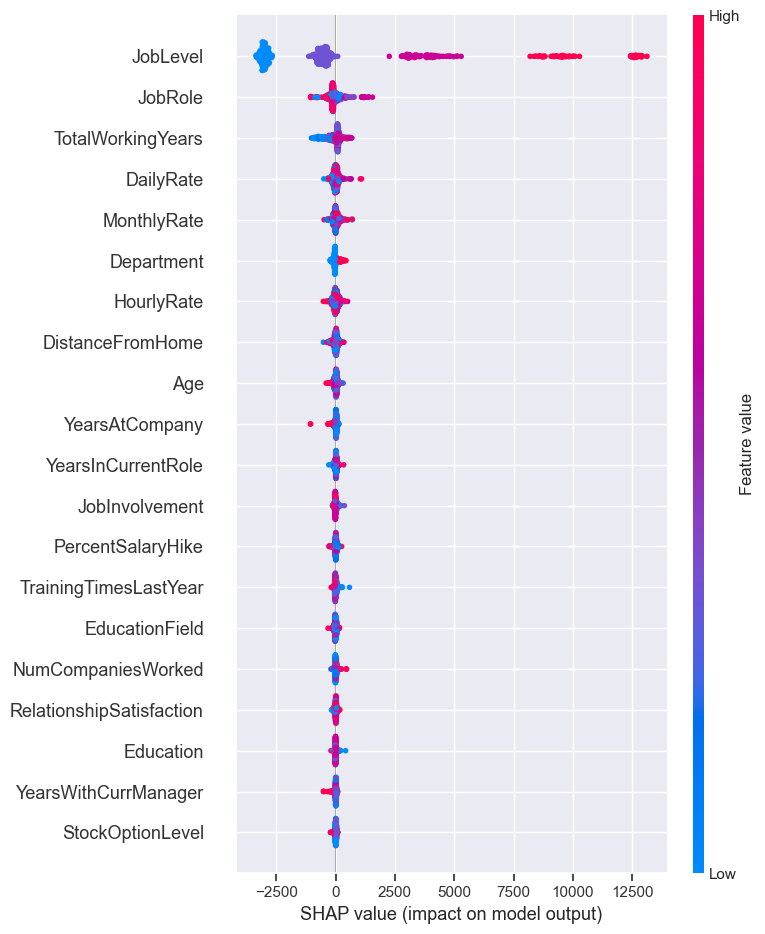

In [ ]:
import shap
explainer = shap.TreeExplainer(xgb_regressor)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

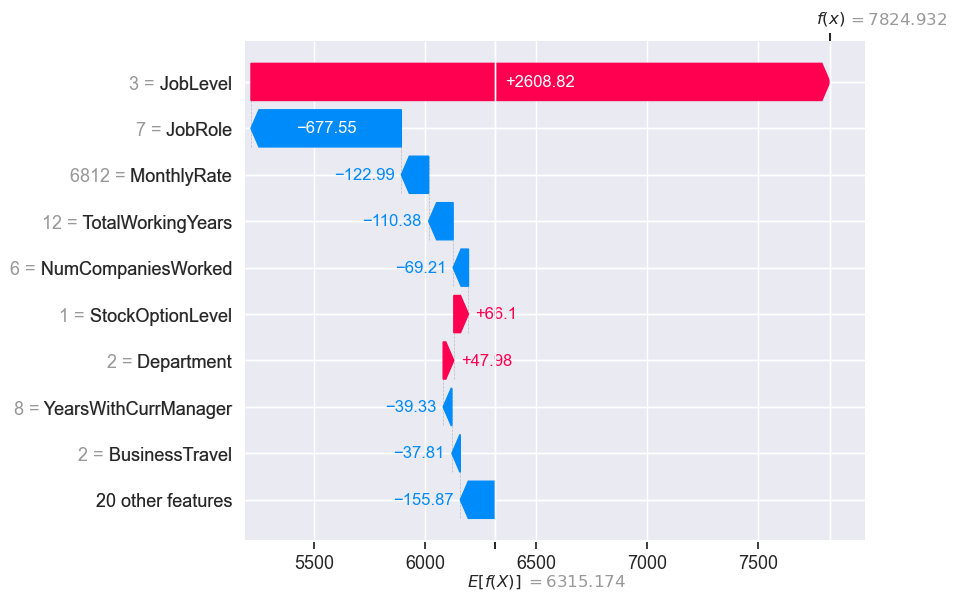

In [ ]:
explainer = shap.Explainer(xgb_regressor, X_test, check_additivity=False)
shap_values = explainer(X_test, check_additivity=False)
shap.plots.waterfall(shap_values[0])

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Train linear regression model
linreg = LinearRegression(fit_intercept= True, normalize= False)
linreg.fit(X_train, y_train)

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.


LinearRegression(normalize=False)

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import math
y_pred = linreg.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1035.8838634345839

MAPE is 0.2104627546281228

MSE is 1955738.1157688624

R2 score is 0.9082493109952113

RMSE score is 1398.4770701619896


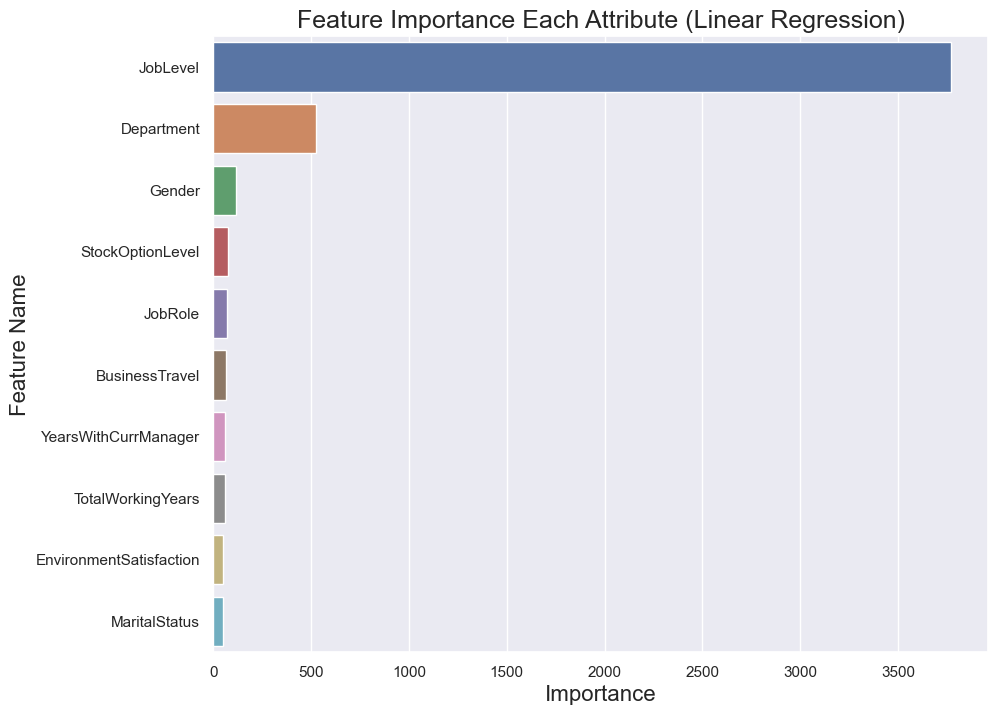

In [ ]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": np.abs(linreg.coef_)
})

# Sort by importance (absolute value of coefficients)
fi = imp_df.sort_values(by="Importance", ascending=False)

# Select the top 10 features
fi2 = fi.head(10)

# Plot the feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attribute (Linear Regression)', fontsize=18)
plt.xlabel('Importance', fontsize=16)
plt.ylabel('Feature Name', fontsize=16)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error as MAPE

# Regressor 1: Linear Regression
linear_regressor = LinearRegression(fit_intercept= True, normalize= False)
linear_regressor.fit(X_train, y_train)

y_train_pred_linear = linear_regressor.predict(X_train)
y_test_pred_linear = linear_regressor.predict(X_test)

# Calculate metrics for Linear Regression
linear_r2_train = linear_regressor.score(X_train, y_train)
linear_r2_test = linear_regressor.score(X_test, y_test)
linear_mse_train = mean_squared_error(y_train, y_train_pred_linear)
linear_mse_test = mean_squared_error(y_test, y_test_pred_linear)
linear_rmse_train = np.sqrt(linear_mse_train)
linear_rmse_test = np.sqrt(linear_mse_test)
linear_mae_train = mean_absolute_error(y_train, y_train_pred_linear)
linear_mae_test = mean_absolute_error(y_test, y_test_pred_linear)
linear_mape_train = MAPE(y_train, y_train_pred_linear)
linear_mape_test = MAPE(y_test, y_test_pred_linear)

# Regressor 2: Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=0, max_depth=None, max_features='auto', min_samples_leaf=1, min_samples_split=2)
dt_regressor.fit(X_train, y_train)

y_train_pred_dt = dt_regressor.predict(X_train)
y_test_pred_dt = dt_regressor.predict(X_test)

# Calculate metrics for Decision Tree Regressor
dt_r2_train = dt_regressor.score(X_train, y_train)
dt_r2_test = dt_regressor.score(X_test, y_test)
dt_mse_train = mean_squared_error(y_train, y_train_pred_dt)
dt_mse_test = mean_squared_error(y_test, y_test_pred_dt)
dt_rmse_train = np.sqrt(dt_mse_train)
dt_rmse_test = np.sqrt(dt_mse_test)
dt_mae_train = mean_absolute_error(y_train, y_train_pred_dt)
dt_mae_test = mean_absolute_error(y_test, y_test_pred_dt)
dt_mape_train = MAPE(y_train, y_train_pred_dt)
dt_mape_test = MAPE(y_test, y_test_pred_dt)

# Regressor 3: Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=0, max_depth=None, min_samples_split=2, n_estimators= 100)
rf_regressor.fit(X_train, y_train)

y_train_pred_rf = rf_regressor.predict(X_train)
y_test_pred_rf = rf_regressor.predict(X_test)

# Calculate metrics for Random Forest Regressor
rf_r2_train = rf_regressor.score(X_train, y_train)
rf_r2_test = rf_regressor.score(X_test, y_test)
rf_mse_train = mean_squared_error(y_train, y_train_pred_rf)
rf_mse_test = mean_squared_error(y_test, y_test_pred_rf)
rf_rmse_train = np.sqrt(rf_mse_train)
rf_rmse_test = np.sqrt(rf_mse_test)
rf_mae_train = mean_absolute_error(y_train, y_train_pred_rf)
rf_mae_test = mean_absolute_error(y_test, y_test_pred_rf)
rf_mape_train = MAPE(y_train, y_train_pred_rf)
rf_mape_test = MAPE(y_test, y_test_pred_rf)

# Regressor 4: XGBoost Regressor
xgb_regressor = XGBRegressor(learning_rate= 0.1, max_depth= 7, n_estimators= 150)
xgb_regressor.fit(X_train, y_train)

y_train_pred_xgb = xgb_regressor.predict(X_train)
y_test_pred_xgb = xgb_regressor.predict(X_test)

# Calculate metrics for XGBoost Regressor
xgb_r2_train = xgb_regressor.score(X_train, y_train)
xgb_r2_test = xgb_regressor.score(X_test, y_test)
xgb_mse_train = mean_squared_error(y_train, y_train_pred_xgb)
xgb_mse_test = mean_squared_error(y_test, y_test_pred_xgb)
xgb_rmse_train = np.sqrt(xgb_mse_train)
xgb_rmse_test = np.sqrt(xgb_mse_test)
xgb_mae_train = mean_absolute_error(y_train, y_train_pred_xgb)
xgb_mae_test = mean_absolute_error(y_test, y_test_pred_xgb)
xgb_mape_train = MAPE(y_train, y_train_pred_xgb)
xgb_mape_test = MAPE(y_test, y_test_pred_xgb)

# Create a dataframe to compare the performance of the regressors
metrics_data = {
    'Regressor': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGBoost Regressor'],
    'R2 (Train)': [linear_r2_train, dt_r2_train, rf_r2_train, xgb_r2_train],
    'R2 (Test)': [linear_r2_test, dt_r2_test, rf_r2_test, xgb_r2_test],
    'MSE (Train)': [linear_mse_train, dt_mse_train, rf_mse_train, xgb_mse_train],
    'MSE (Test)': [linear_mse_test, dt_mse_test, rf_mse_test, xgb_mse_test],
    'RMSE (Train)': [linear_rmse_train, dt_rmse_train, rf_rmse_train, xgb_rmse_train],
    'RMSE (Test)': [linear_rmse_test, dt_rmse_test, rf_rmse_test, xgb_rmse_test],
    'MAE (Train)': [linear_mae_train, dt_mae_train, rf_mae_train, xgb_mae_train],
    'MAE (Test)': [linear_mae_test, dt_mae_test, rf_mae_test, xgb_mae_test],
    'MAPE (Train)': [linear_mape_train, dt_mape_train, rf_mape_train, xgb_mape_train],
    'MAPE (Test)': [linear_mape_test, dt_mape_test, rf_mape_test, xgb_mape_test]
}

metrics_df = pd.DataFrame(metrics_data)
metrics_df

'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.


Regressor  R2 (Train)  R2 (Test)   MSE (Train)    MSE (Test)  \
0        Linear Regression    0.893421   0.908249  1.960558e+06  1.955738e+06   
1  Decision Tree Regressor    1.000000   0.970227  0.000000e+00  6.346416e+05   
2  Random Forest Regressor    0.996647   0.980457  6.167560e+04  4.165796e+05   
3        XGBoost Regressor    0.999308   0.985123  1.272781e+04  3.171054e+05   

   RMSE (Train)  RMSE (Test)  MAE (Train)   MAE (Test)  MAPE (Train)  \
0   1400.199320  1398.477070  1051.110195  1035.883863      0.217276   
1      0.000000   796.643990     0.000000   292.792517      0.000000   
2    248.345729   645.429777   158.962715   436.431122      0.034243   
3    112.817598   563.121104    72.804619   296.280128      0.017983   

   MAPE (Test)  
0     0.210463  
1     0.059545  
2     0.090384  
3     0.061493

# Clustering

In [ ]:
df2 = pd.read_csv('/kaggle/input/employee-attrition/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df2.head()

Unnamed: 0  EmployeeNumber Attrition  Age     BusinessTravel  DailyRate  \
0           0               1       Yes   41      Travel_Rarely       1102   
1           1               2        No   49  Travel_Frequently        279   
2           2               3       Yes   37      Travel_Rarely       1373   
3           3               4        No   33  Travel_Frequently       1392   
4           4               5        No   27      Travel_Rarely        591   

               Department  DistanceFromHome  Education EducationField  \
0                   Sales                 1          2  Life Sciences   
1  Research & Development                 8          1  Life Sciences   
2  Research & Development                 2          2          Other   
3  Research & Development                 3          4  Life Sciences   
4  Research & Development                 2          1        Medical   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [ ]:
#Drop kolom Unnamed:0 ,EmployeeNumber, dan StandardHours, Over18, Performance Rating
df2.drop(columns=['Unnamed: 0','EmployeeNumber', 'StandardHours','Over18', 'PerformanceRating'], inplace=True)

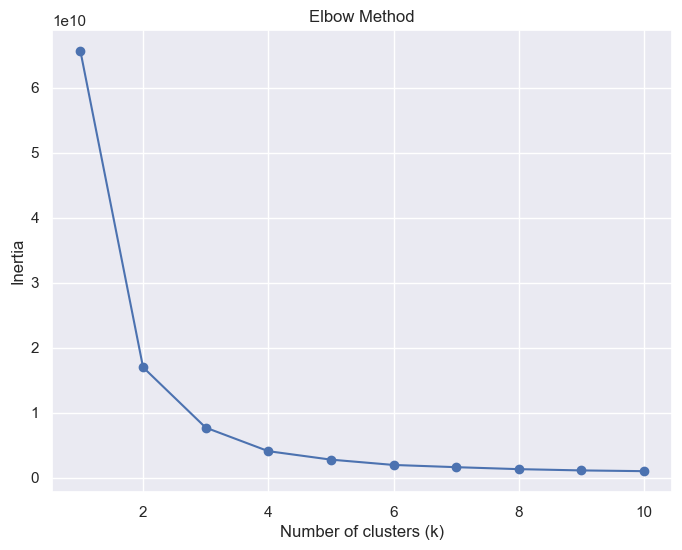

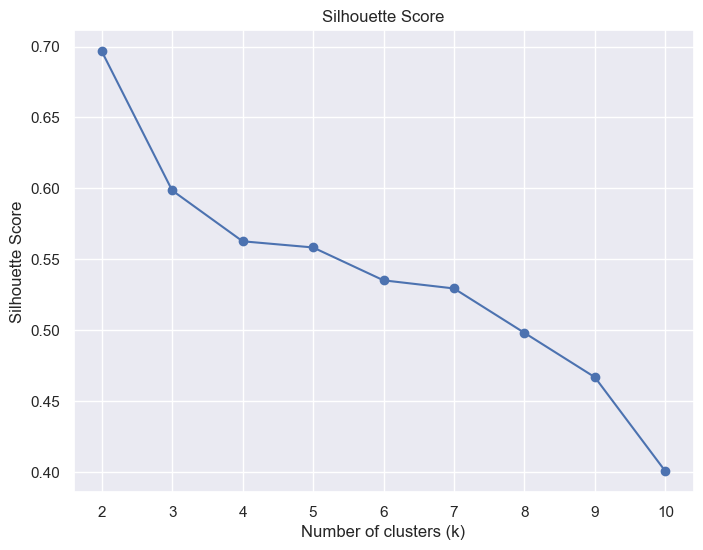

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find optimal k using the Elbow Method
def find_optimal_k_elbow(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot Elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

# Function to find optimal k using the Silhouette Score
def find_optimal_k_silhouette(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot Silhouette Score graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.show()

selected_columns = ['MonthlyIncome', 'Age', 'DailyRate']
X = df2[selected_columns]

# Mencari nilai k optimal menggunakan Elbow Method
max_k = 10
find_optimal_k_elbow(X, max_k)

# Mencari nilai k optimal menggunakan Silhouette Score
find_optimal_k_silhouette(X, max_k)

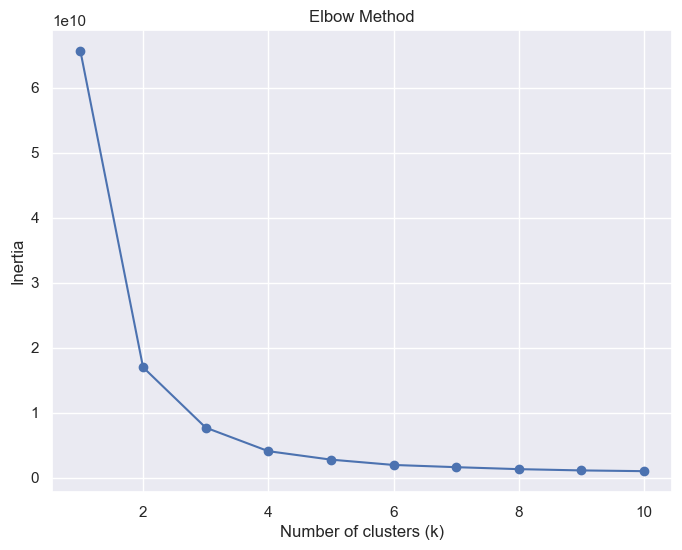

Attrition  Age     BusinessTravel  DailyRate              Department  \
0          Yes   41      Travel_Rarely       1102                   Sales   
1           No   49  Travel_Frequently        279  Research & Development   
2          Yes   37      Travel_Rarely       1373  Research & Development   
3           No   33  Travel_Frequently       1392  Research & Development   
4           No   27      Travel_Rarely        591  Research & Development   
...        ...  ...                ...        ...                     ...   
2935        No   36  Travel_Frequently        884  Research & Development   
2936        No   39      Travel_Rarely        613  Research & Development   
2937        No   27      Travel_Rarely        155  Research & Development   
2938        No   49  Travel_Frequently       1023                   Sales   
2939        No   34      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
2935                23          2        Medical                        3   
2936                 6          1        Medical                        4   
2937                 4          3  Life Sciences                        2   
2938                 2          3        Medical                        4   
2939                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
2935    Male          41               4         2      Laboratory Technician   
2936    Male          42               2         3  Healthcare Representative   
2937    Male          87               4         2     Manufacturing Director   
2938    Male          63               2         2            Sales Executive   
2939    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
2935                4       Married           2571        12290   
2936                1       Married           9991        21457   
2937                2       Married           6142         5174   
2938                2       Married           5390        13243   
2939                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  \
0                      8      Yes                 11   
1                      1       No                 23   
2                      6      Yes                 15   
3                      1      Yes                 11   
4                      9       No                 12   
...                  ...      ...        

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Function to find optimal k using the Elbow Method
def find_optimal_k_elbow(X, max_k):
    inertias = []
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    # Plot Elbow graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), inertias, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')
    plt.show()

    # Return the fitted KMeans model with optimal k
    optimal_k = np.argmin(np.diff(inertias)) + 2
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)
    return kmeans

# Function to find optimal k using the Silhouette Score
def find_optimal_k_silhouette(X, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        silhouette_scores.append(silhouette_score(X, labels))

    # Plot Silhouette Score graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score')
    plt.show()

    # Return the fitted KMeans model with optimal k
    optimal_k = np.argmax(silhouette_scores) + 2
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(X)
    return kmeans


selected_columns = ['MonthlyIncome', 'Age', 'DailyRate']
X = df2[selected_columns]

# Mencari nilai k optimal menggunakan Elbow Method
max_k = 10
kmeans_model = find_optimal_k_elbow(X, max_k)

# Predict cluster labels and add 'label' column to the DataFrame
df2['label'] = kmeans_model.predict(X)

df2


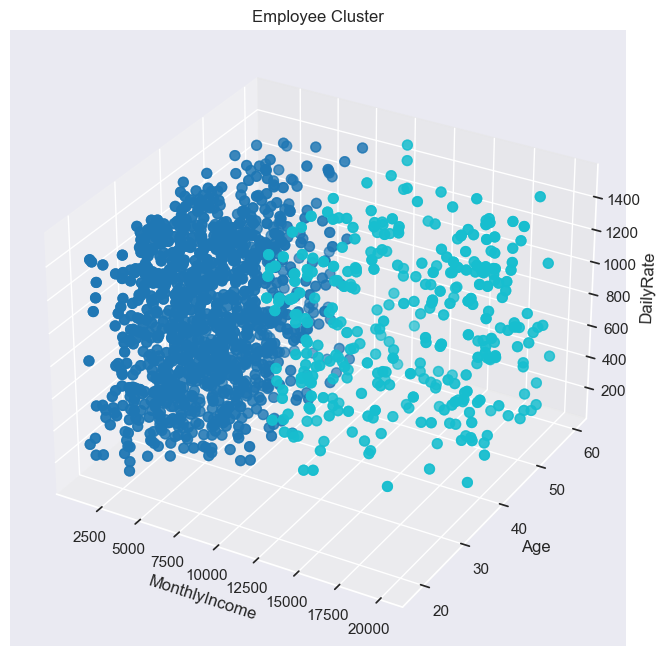

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Visualization of the Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a colormap for the clusters
colors = plt.cm.tab10(df2['label'] / float(max(df2['label'])))

# Plot the data points
ax.scatter(df2['MonthlyIncome'], df2['Age'], df2['DailyRate'], c=colors, s=50)

# Set labels for the axes
ax.set_xlabel('MonthlyIncome')
ax.set_ylabel('Age')
ax.set_zlabel('DailyRate')

# Set the title
ax.set_title('Employee Cluster')

plt.show()